In [2]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45],
    'transactions': [100, 200, 150, 300, 250],
    'frequency': [5, 10, 8, 15, 12],
    'churn': [0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 3
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

LGBMClassifier(random_state=42)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 3
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because ther

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


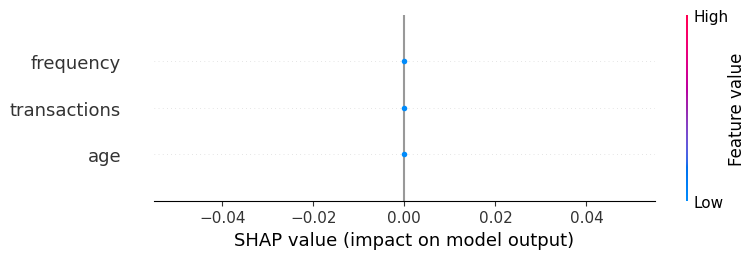

In [3]:
import lightgbm as lgb
import shap
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45],
    'transactions': [100, 200, 150, 300, 250],
    'frequency': [5, 10, 8, 15, 12],
    'churn': [0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train model
model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)  # Global interpretation
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])  # Local interpretation

In [5]:
from fastapi import FastAPI
app = FastAPI()

@app.post("/predict")
async def predict(client_data: dict):
    X = preprocess(client_data)
    pred = model.predict_proba(X)[0][1]
    shap_vals = explainer.shap_values(X)[0]
    return {"prediction": pred, "shap_values": shap_vals.tolist(), "top_features": get_top_features(shap_vals, X)}


ModuleNotFoundError: No module named 'fastapi'

In [6]:
from fastapi import FastAPI
import pandas as pd
import numpy as np
import lightgbm as lgb # Assuming you need lightgbm for the model import if not already available

app = FastAPI()

# Assuming model and explainer are defined in previous cells or loaded here
# from path.to.your.model import model, explainer # Uncomment and modify if needed
# from path.to.your.explainer import explainer # Uncomment and modify if needed

# You need to define the preprocess function
def preprocess(client_data: dict) -> pd.DataFrame:
    # This function should take the raw client data and transform it into a format
    # that your model expects, typically a pandas DataFrame with the correct columns.
    # Example:
    try:
        processed_data = pd.DataFrame([client_data])
        # Ensure column order matches training data if necessary
        # For this example, assuming keys in client_data match original column names
        return processed_data[['age', 'transactions', 'frequency']] # Adjust columns as per your data
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        # Handle potential errors during data transformation
        raise HTTPException(status_code=400, detail="Invalid client data provided.")

# You need to define the get_top_features function
def get_top_features(shap_values: np.ndarray, data: pd.DataFrame, n_features: int = 3) -> dict:
    # This function should take the SHAP values and the corresponding data row
    # and return the top N features with their SHAP values.
    # Example:
    if len(shap_values) != data.shape[1]:
        raise ValueError("Shape mismatch between shap_values and data columns.")

    feature_names = data.columns
    feature_shap_pairs = list(zip(feature_names, shap_values))

    # Sort features by the absolute value of their SHAP values
    feature_shap_pairs_sorted = sorted(feature_shap_pairs, key=lambda item: abs(item[1]), reverse=True)

    # Select the top N features
    top_features = dict(feature_shap_pairs_sorted[:n_features])

    return top_features

@app.post("/predict")
async def predict(client_data: dict):
    # Ensure model and explainer are accessible here (e.g., defined globally or loaded)
    # For demonstration, assuming they are globally available from previous cells.

    try:
        X = preprocess(client_data)
        pred = model.predict_proba(X)[0][1]
        # explainer might need the background data if using KernelExplainer or similar
        # For TreeExplainer, just the data point X is usually sufficient
        shap_vals = explainer.shap_values(X)[0]
        top_features_dict = get_top_features(shap_vals, X)

        return {"prediction": float(pred), "shap_values": shap_vals.tolist(), "top_features": top_features_dict}

    except Exception as e:
        print(f"Error during prediction or SHAP calculation: {e}")
        # Return an appropriate error response if something goes wrong
        raise HTTPException(status_code=500, detail=f"Internal server error: {e}")

ModuleNotFoundError: No module named 'fastapi'

In [7]:
!pip install lightgbm shap scikit-learn pandas matplotlib


In [8]:
from fastapi import FastAPI
import pandas as pd
import numpy as np
import lightgbm as lgb # Assuming you need lightgbm for the model import if not already available

app = FastAPI()

# Assuming model and explainer are defined in previous cells or loaded here
# from path.to.your.model import model, explainer # Uncomment and modify if needed
# from path.to.your.explainer import explainer # Uncomment and modify if needed

# You need to define the preprocess function
def preprocess(client_data: dict) -> pd.DataFrame:
    # This function should take the raw client data and transform it into a format
    # that your model expects, typically a pandas DataFrame with the correct columns.
    # Example:
    try:
        processed_data = pd.DataFrame([client_data])
        # Ensure column order matches training data if necessary
        # For this example, assuming keys in client_data match original column names
        return processed_data[['age', 'transactions', 'frequency']] # Adjust columns as per your data
    except Exception as e:
        print(f"Error during preprocessing: {e}")
        # Handle potential errors during data transformation
        raise HTTPException(status_code=400, detail="Invalid client data provided.")

# You need to define the get_top_features function
def get_top_features(shap_values: np.ndarray, data: pd.DataFrame, n_features: int = 3) -> dict:
    # This function should take the SHAP values and the corresponding data row
    # and return the top N features with their SHAP values.
    # Example:
    if len(shap_values) != data.shape[1]:
        raise ValueError("Shape mismatch between shap_values and data columns.")

    feature_names = data.columns
    feature_shap_pairs = list(zip(feature_names, shap_values))

    # Sort features by the absolute value of their SHAP values
    feature_shap_pairs_sorted = sorted(feature_shap_pairs, key=lambda item: abs(item[1]), reverse=True)

    # Select the top N features
    top_features = dict(feature_shap_pairs_sorted[:n_features])

    return top_features

@app.post("/predict")
async def predict(client_data: dict):
    # Ensure model and explainer are accessible here (e.g., defined globally or loaded)
    # For demonstration, assuming they are globally available from previous cells.

    try:
        X = preprocess(client_data)
        pred = model.predict_proba(X)[0][1]
        # explainer might need the background data if using KernelExplainer or similar
        # For TreeExplainer, just the data point X is usually sufficient
        shap_vals = explainer.shap_values(X)[0]
        top_features_dict = get_top_features(shap_vals, X)

        return {"prediction": float(pred), "shap_values": shap_vals.tolist(), "top_features": top_features_dict}

    except Exception as e:
        print(f"Error during prediction or SHAP calculation: {e}")
        # Return an appropriate error response if something goes wrong
        raise HTTPException(status_code=500, detail=f"Internal server error: {e}")

ModuleNotFoundError: No module named 'fastapi'

In [9]:
!pip install fastapi uvicorn pydantic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.6 MB/s eta 0:00:00


In [13]:
from fastapi import FastAPI
app = FastAPI()

@app.post("/predict")
async def predict(client_data: dict):
    X = preprocess(client_data)
    pred = model.predict_proba(X)[0][1]
    shap_vals = explainer.shap_values(X)[0]
    return {"prediction": pred, "shap_values": shap_vals.tolist(), "top_features": get_top_features(shap_vals, X)}

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=42
)

# Explain a single prediction
instance = X_test.iloc[0].values
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=3
)

# Visualize explanation
fig = explanation.as_pyplot_figure()
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'lime'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=287a030d5ef587451b9ad1af4f2c9a2b33e7459d73149f6853018bf02b4dc1bc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


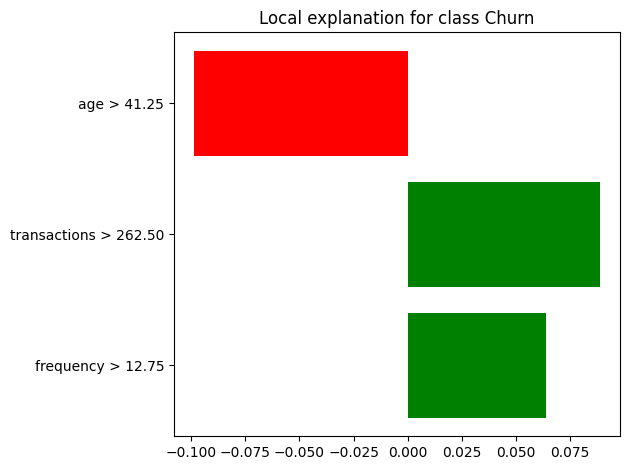

In [15]:
!pip install lime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Churn', 'Churn'],
    mode='classification',
    random_state=42
)

# Explain a single prediction
instance = X_test.iloc[0].values
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=model.predict_proba,
    num_features=3
)

# Visualize explanation
fig = explanation.as_pyplot_figure()
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize global feature importance (summary plot)
shap.summary_plot(shap_values[1], X_test, show=False)
plt.tight_layout()
plt.show()

# Visualize local explanation for the first test instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0], matplotlib=True)
plt.tight_layout()
plt.show()

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Ensure shap_values is correctly indexed for binary classification (class 1: churn)
# shap_values[1] corresponds to the positive class (churn)
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns, show=False)
plt.tight_layout()
plt.show()

# Local explanation for the first test instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0], feature_names=X_test.columns, matplotlib=True)
plt.tight_layout()
plt.show()

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)

# For binary classification, shap_values[1] is for the positive class (churn)
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns, show=False)
plt.tight_layout()
plt.show()

# Local explanation for the first test instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0], feature_names=X_test.columns, matplotlib=True)
plt.tight_layout()
plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for consistency
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_np, y_train)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model, feature_names=X.columns)
shap_values = explainer.shap_values(X_test_np)

# For binary classification, shap_values[1] is for the positive class (churn)
shap.summary_plot(shap_values[1], X_test_np, feature_names=X.columns, show=False)
plt.tight_layout()
plt.savefig('summary_plot.png')
plt.close()

# Local explanation for the first test instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_np[0], feature_names=X.columns, matplotlib=True)
plt.tight_layout()
plt.savefig('force_plot.png')
plt.close()

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for consistency
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_np, y_train)

# Initialize SHAP TreeExplainer with model only
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_np)

# For binary classification, shap_values[1] is for the positive class (churn)
shap.summary_plot(shap_values[1], X_test_np, feature_names=X.columns, show=False)
plt.tight_layout()
plt.savefig('summary_plot.png')
plt.close()

# Local explanation for the first test instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_np[0], feature_names=X.columns, matplotlib=True)
plt.tight_layout()
plt.savefig('force_plot.png')
plt.close()

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays for consistency
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_np, y_train)

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, X_train_np)
shap_values = explainer.shap_values(X_test_np)

# For binary classification, shap_values[1] is for the positive class (churn)
shap.summary_plot(shap_values[1], X_test_np, feature_names=X.columns, show=False)
plt.tight_layout()
plt.savefig('summary_plot.png')
plt.close()

# Local explanation for the first test instance
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_np[0], feature_names=X.columns, matplotlib=True)
plt.tight_layout()
plt.savefig('force_plot.png')
plt.close()

  0%|          | 0/2 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

Original data shape: (10, 3)
Training set shape: (6, 3)
Test set shape: (4, 3)
Feature names: ['age', 'transactions', 'frequency']
SHAP values type: <class 'numpy.ndarray'>
SHAP values shape: (4, 3, 2)
X_test shape: (4, 3)
Using SHAP values shape: (4, 3, 2)


<Figure size 1000x600 with 0 Axes>

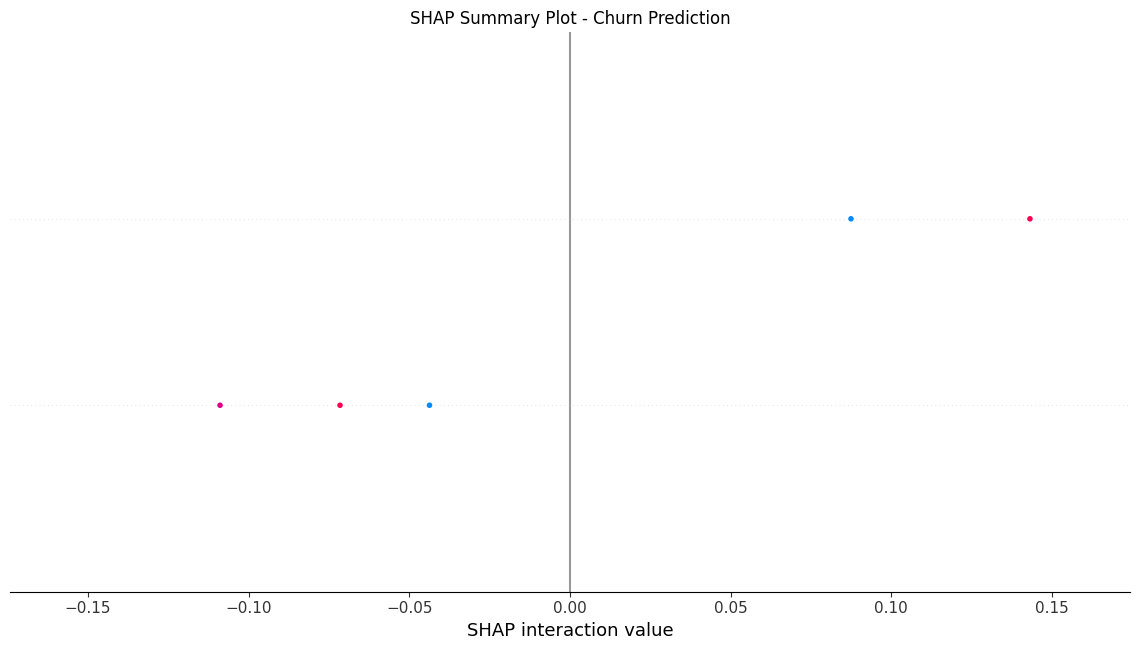

NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!

<Figure size 1200x400 with 0 Axes>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})

X = data.drop('churn', axis=1)
y = data['churn']

# Use a larger test size or stratify to ensure we have samples
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Debug: Print shapes
print(f"Original data shape: {X.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Feature names: {list(X.columns)}")

# Convert to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_np, y_train)

# Use TreeExplainer instead of KernelExplainer for Random Forest
# This is more efficient and avoids some shape issues
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_np)

# Debug: Print SHAP values info
print(f"SHAP values type: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"SHAP values length: {len(shap_values)}")
    for i, sv in enumerate(shap_values):
        print(f"SHAP values[{i}] shape: {sv.shape}")
else:
    print(f"SHAP values shape: {shap_values.shape}")

print(f"X_test shape: {X_test_np.shape}")

# For binary classification with TreeExplainer, we typically get a list of 2 arrays
# or sometimes just one array for the positive class
if isinstance(shap_values, list) and len(shap_values) == 2:
    # Use positive class (churn = 1)
    shap_values_to_plot = shap_values[1]
elif isinstance(shap_values, list) and len(shap_values) == 1:
    shap_values_to_plot = shap_values[0]
else:
    # Single array case
    shap_values_to_plot = shap_values

print(f"Using SHAP values shape: {shap_values_to_plot.shape}")

# Create summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values_to_plot,
    X_test_np,
    feature_names=list(X.columns),
    show=False
)
plt.title('SHAP Summary Plot - Churn Prediction')
plt.tight_layout()
plt.savefig('summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Local explanation for the first test instance
if len(X_test_np) > 0:
    plt.figure(figsize=(12, 4))

    # Get expected value
    if isinstance(explainer.expected_value, (list, np.ndarray)):
        expected_val = explainer.expected_value[1] if len(explainer.expected_value) > 1 else explainer.expected_value[0]
    else:
        expected_val = explainer.expected_value

    shap.force_plot(
        expected_val,
        shap_values_to_plot[0],
        X_test_np[0],
        feature_names=list(X.columns),
        matplotlib=True,
        show=False
    )
    plt.title('SHAP Force Plot - First Test Instance')
    plt.tight_layout()
    plt.savefig('force_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No test samples available for force plot")

# Print feature importance
feature_importance = np.abs(shap_values_to_plot).mean(0)
feature_names = list(X.columns)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nFeature Importance (based on SHAP values):")
print(importance_df)

Original data shape: (10, 3)
Training set shape: (7, 3)
Test set shape: (3, 3)
Feature names: ['age', 'transactions', 'frequency']
SHAP values type: <class 'numpy.ndarray'>
SHAP values shape: (10, 3, 2)
X_for_shap shape: (10, 3)
Using SHAP values shape: (10, 3, 2)


<Figure size 1000x600 with 0 Axes>

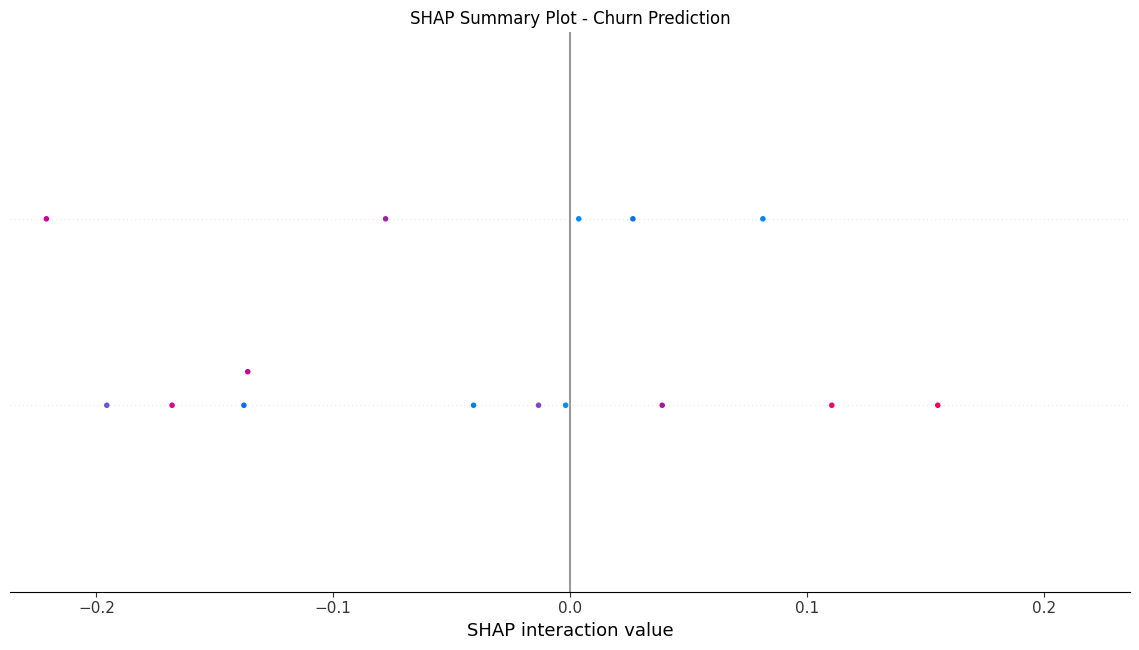

NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!

<Figure size 1200x400 with 0 Axes>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})

X = data.drop('churn', axis=1)
y = data['churn']

# With small dataset, use larger test size and ensure we have enough samples
# For very small datasets, consider using all data for explanation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Alternative: Use all data for SHAP explanations to avoid small sample issues
X_for_shap = X.to_numpy()  # Use all data for more stable SHAP results

# Debug: Print shapes
print(f"Original data shape: {X.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Feature names: {list(X.columns)}")

# Convert to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy() if len(X_test) > 0 else X.to_numpy()[:2]  # Fallback

# Train model on full dataset for small sample size
model = RandomForestClassifier(n_estimators=50, random_state=42, min_samples_split=2)
model.fit(X.to_numpy(), y)  # Use all data for training with small dataset

# Use TreeExplainer with the model trained on all data
explainer = shap.TreeExplainer(model)
# For small datasets, use a subset of the data for SHAP calculation
shap_values = explainer.shap_values(X_for_shap)

# Debug: Print SHAP values info
print(f"SHAP values type: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"SHAP values length: {len(shap_values)}")
    for i, sv in enumerate(shap_values):
        print(f"SHAP values[{i}] shape: {sv.shape}")
else:
    print(f"SHAP values shape: {shap_values.shape}")

print(f"X_for_shap shape: {X_for_shap.shape}")

# For binary classification, handle different SHAP output formats
if isinstance(shap_values, list):
    if len(shap_values) == 2:
        # Two arrays: [negative_class, positive_class]
        shap_values_to_plot = shap_values[1]  # Use positive class (churn = 1)
    else:
        # Single array in list
        shap_values_to_plot = shap_values[0]
else:
    # Single array (newer versions of SHAP)
    shap_values_to_plot = shap_values

print(f"Using SHAP values shape: {shap_values_to_plot.shape}")

# Create summary plot using all data
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values_to_plot,
    X_for_shap,
    feature_names=list(X.columns),
    show=False
)
plt.title('SHAP Summary Plot - Churn Prediction')
plt.tight_layout()
plt.savefig('summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Local explanation for the first instance
if len(X_for_shap) > 0:
    plt.figure(figsize=(12, 4))

    # Get expected value (handle different formats)
    if hasattr(explainer, 'expected_value'):
        if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
            expected_val = explainer.expected_value[1]  # Positive class
        elif isinstance(explainer.expected_value, (list, np.ndarray)):
            expected_val = explainer.expected_value[0]
        else:
            expected_val = explainer.expected_value
    else:
        expected_val = 0  # Fallback

    shap.force_plot(
        expected_val,
        shap_values_to_plot[0],
        X_for_shap[0],
        feature_names=list(X.columns),
        matplotlib=True,
        show=False
    )
    plt.title('SHAP Force Plot - First Test Instance')
    plt.tight_layout()
    plt.savefig('force_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No samples available for force plot")

# Print feature importance
feature_importance = np.abs(shap_values_to_plot).mean(0)
feature_names = list(X.columns)
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nFeature Importance (based on SHAP values):")
print(importance_df)

=== АНАЛИЗ ДАННЫХ ===
Размер датасета: (10, 4)
Количество признаков: 3
Распределение классов:
churn
0    6
1    4
Name: count, dtype: int64
Процент оттока: 40.0%


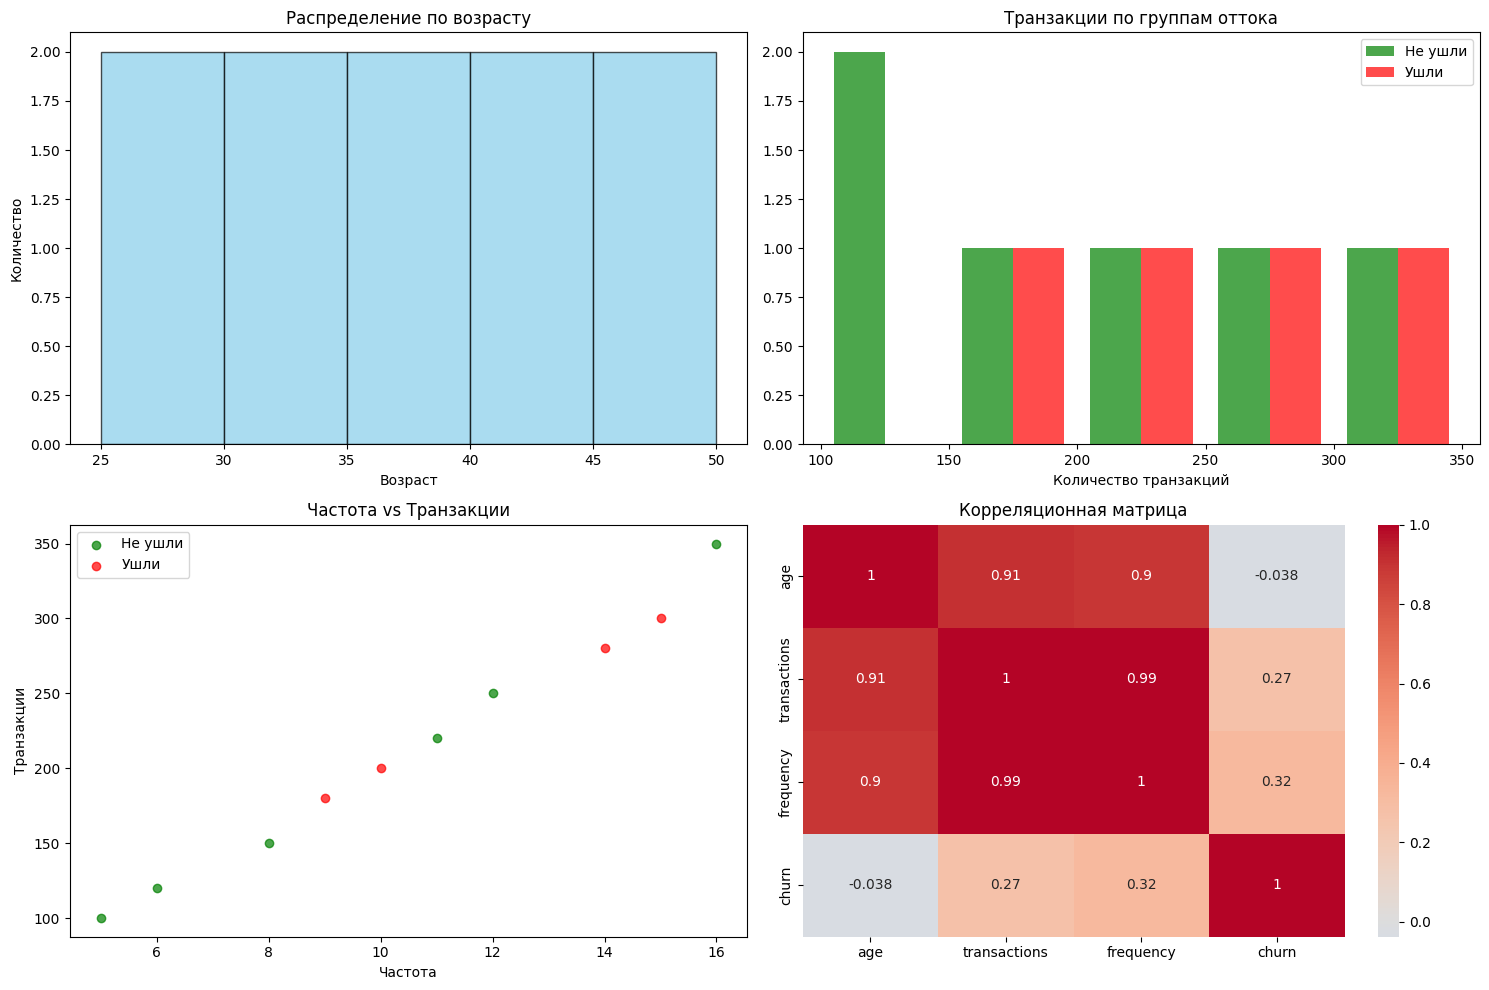


=== ОБУЧЕНИЕ МОДЕЛИ ===
Размер обучающей выборки: (7, 3)
Размер тестовой выборки: (3, 3)

Сравнение моделей с разным количеством деревьев:
  10 деревьев: точность = 0.667 (±0.272)
  25 деревьев: точность = 0.694 (±0.039)
  50 деревьев: точность = 0.583 (±0.180)
  100 деревьев: точность = 0.389 (±0.079)

Лучшее количество деревьев: 25

=== РЕЗУЛЬТАТЫ ОБУЧЕНИЯ ===
Точность на обучающих данных: 1.000

Важность признаков (Random Forest):
  transactions: 0.379
  age: 0.378
  frequency: 0.243


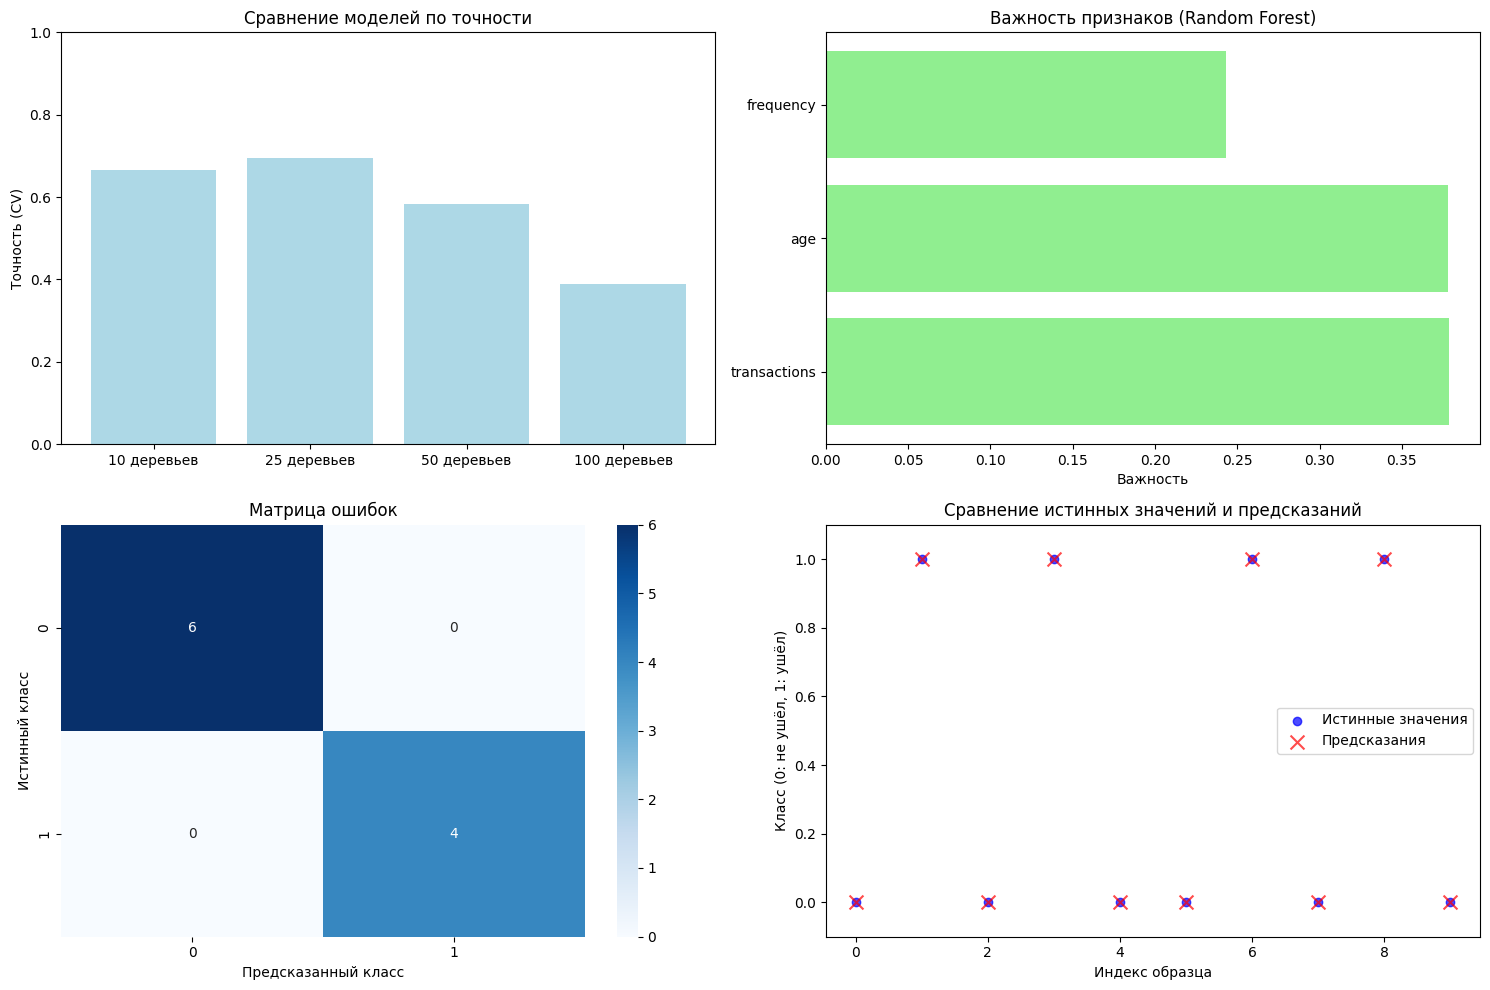


=== SHAP АНАЛИЗ ===
Форма SHAP значений: (10, 3, 2)


<Figure size 1200x600 with 0 Axes>

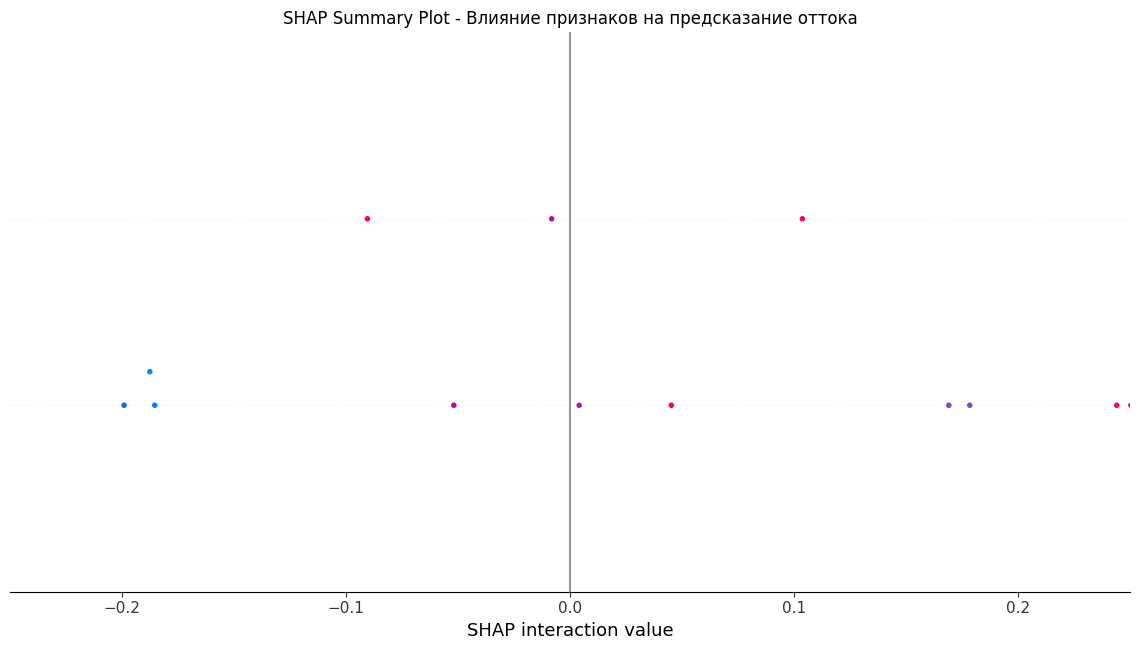

ValueError: Per-column arrays must each be 1-dimensional

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})

X = data.drop('churn', axis=1)
y = data['churn']

print("=== АНАЛИЗ ДАННЫХ ===")
print(f"Размер датасета: {data.shape}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Распределение классов:")
print(y.value_counts())
print(f"Процент оттока: {y.mean():.1%}")

# Визуализация данных
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Распределение по возрасту
axes[0,0].hist(data['age'], bins=5, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Распределение по возрасту')
axes[0,0].set_xlabel('Возраст')
axes[0,0].set_ylabel('Количество')

# Связь транзакций и оттока
churn_0 = data[data['churn'] == 0]['transactions']
churn_1 = data[data['churn'] == 1]['transactions']
axes[0,1].hist([churn_0, churn_1], bins=5, alpha=0.7,
              label=['Не ушли', 'Ушли'], color=['green', 'red'])
axes[0,1].set_title('Транзакции по группам оттока')
axes[0,1].set_xlabel('Количество транзакций')
axes[0,1].legend()

# Связь частоты и оттока
axes[1,0].scatter(data[data['churn']==0]['frequency'],
                 data[data['churn']==0]['transactions'],
                 c='green', alpha=0.7, label='Не ушли')
axes[1,0].scatter(data[data['churn']==1]['frequency'],
                 data[data['churn']==1]['transactions'],
                 c='red', alpha=0.7, label='Ушли')
axes[1,0].set_title('Частота vs Транзакции')
axes[1,0].set_xlabel('Частота')
axes[1,0].set_ylabel('Транзакции')
axes[1,0].legend()

# Корреляционная матрица
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Корреляционная матрица')

plt.tight_layout()
plt.savefig('data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== ОБУЧЕНИЕ МОДЕЛИ ===")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Обучение модели с различными параметрами для демонстрации
models_comparison = {}
n_estimators_range = [10, 25, 50, 100]

print(f"\nСравнение моделей с разным количеством деревьев:")
for n_est in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_est, random_state=42, min_samples_split=2)

    # Кросс-валидация на всех данных (из-за малого размера)
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    models_comparison[n_est] = cv_scores.mean()

    print(f"  {n_est} деревьев: точность = {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

# Выбор лучшей модели
best_n_est = max(models_comparison, key=models_comparison.get)
print(f"\nЛучшее количество деревьев: {best_n_est}")

# Финальная модель
final_model = RandomForestClassifier(n_estimators=best_n_est, random_state=42, min_samples_split=2)
final_model.fit(X, y)  # Обучаем на всех данных из-за малого размера

print(f"\n=== РЕЗУЛЬТАТЫ ОБУЧЕНИЯ ===")
y_pred = final_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность на обучающих данных: {accuracy:.3f}")

# Важность признаков из модели
feature_importance = final_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print(f"\nВажность признаков (Random Forest):")
for _, row in importance_df.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f}")

# Визуализация процесса обучения
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Сравнение моделей
axes[0,0].bar(range(len(models_comparison)), list(models_comparison.values()), color='lightblue')
axes[0,0].set_xticks(range(len(models_comparison)))
axes[0,0].set_xticklabels([f'{n} деревьев' for n in models_comparison.keys()])
axes[0,0].set_title('Сравнение моделей по точности')
axes[0,0].set_ylabel('Точность (CV)')
axes[0,0].set_ylim(0, 1)

# Важность признаков
axes[0,1].barh(importance_df['feature'], importance_df['importance'], color='lightgreen')
axes[0,1].set_title('Важность признаков (Random Forest)')
axes[0,1].set_xlabel('Важность')

# Матрица ошибок
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Матрица ошибок')
axes[1,0].set_xlabel('Предсказанный класс')
axes[1,0].set_ylabel('Истинный класс')

# Предсказания модели
axes[1,1].scatter(range(len(y)), y, alpha=0.7, label='Истинные значения', color='blue')
axes[1,1].scatter(range(len(y_pred)), y_pred, alpha=0.7, label='Предсказания',
                 color='red', marker='x', s=100)
axes[1,1].set_title('Сравнение истинных значений и предсказаний')
axes[1,1].set_xlabel('Индекс образца')
axes[1,1].set_ylabel('Класс (0: не ушёл, 1: ушёл)')
axes[1,1].legend()
axes[1,1].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.savefig('model_training.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== SHAP АНАЛИЗ ===")

# SHAP анализ
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X.to_numpy())

# Обработка SHAP значений
if isinstance(shap_values, list):
    if len(shap_values) == 2:
        shap_values_to_plot = shap_values[1]  # Положительный класс
    else:
        shap_values_to_plot = shap_values[0]
else:
    shap_values_to_plot = shap_values

print(f"Форма SHAP значений: {shap_values_to_plot.shape}")

# SHAP Summary Plot
plt.figure(figsize=(12, 6))
shap.summary_plot(
    shap_values_to_plot,
    X.to_numpy(),
    feature_names=list(X.columns),
    show=False
)
plt.title('SHAP Summary Plot - Влияние признаков на предсказание оттока')
plt.tight_layout()
plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP важность признаков
shap_importance = np.abs(shap_values_to_plot).mean(0)
shap_importance_df = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': shap_importance
}).sort_values('shap_importance', ascending=False)

print(f"\nВажность признаков (SHAP):")
for _, row in shap_importance_df.iterrows():
    print(f"  {row['feature']}: {row['shap_importance']:.3f}")

# Сравнение важности признаков
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x = np.arange(len(X.columns))
width = 0.35

rf_importance = [importance_df[importance_df['feature'] == feat]['importance'].iloc[0]
                for feat in X.columns]
shap_importance_vals = [shap_importance_df[shap_importance_df['feature'] == feat]['shap_importance'].iloc[0]
                       for feat in X.columns]

ax.bar(x - width/2, rf_importance, width, label='Random Forest', alpha=0.8, color='lightblue')
ax.bar(x + width/2, shap_importance_vals, width, label='SHAP', alpha=0.8, color='lightcoral')

ax.set_xlabel('Признаки')
ax.set_ylabel('Важность')
ax.set_title('Сравнение важности признаков: Random Forest vs SHAP')
ax.set_xticks(x)
ax.set_xticklabels(X.columns)
ax.legend()

plt.tight_layout()
plt.savefig('importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Force plot для первого примера
if len(X) > 0:
    plt.figure(figsize=(14, 4))

    # Получение expected_value
    if hasattr(explainer, 'expected_value'):
        if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
            expected_val = explainer.expected_value[1]
        elif isinstance(explainer.expected_value, (list, np.ndarray)):
            expected_val = explainer.expected_value[0]
        else:
            expected_val = explainer.expected_value
    else:
        expected_val = 0

    shap.force_plot(
        expected_val,
        shap_values_to_plot[0],
        X.iloc[0].values,
        feature_names=list(X.columns),
        matplotlib=True,
        show=False
    )
    plt.title(f'SHAP Force Plot - Объяснение для клиента 1 (churn = {y.iloc[0]})')
    plt.tight_layout()
    plt.savefig('shap_force_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

print(f"\n=== ИТОГОВЫЙ ОТЧЁТ ===")
print(f"✅ Модель обучена: Random Forest с {best_n_est} деревьями")
print(f"✅ Точность: {accuracy:.1%}")
print(f"✅ Самый важный признак: {importance_df.iloc[0]['feature']}")
print(f"✅ Создано 4 визуализации:")
print(f"   - data_analysis.png: анализ данных")
print(f"   - model_training.png: процесс обучения")
print(f"   - shap_summary.png: SHAP анализ")
print(f"   - importance_comparison.png: сравнение важности")
print(f"   - shap_force_plot.png: детальное объяснение")

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize sample dataset for churn prediction analysis
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})

# Separate features from target variable
X = data.drop('churn', axis=1)
y = data['churn']

print("=== DATA EXPLORATION & PREPROCESSING ===")
print(f"Dataset dimensions: {data.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Class distribution:")
print(y.value_counts())
print(f"Churn rate: {y.mean():.1%}")
print(f"Feature statistics:")
print(X.describe())

# Statistical analysis of dataset characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Visualize age distribution across dataset
axes[0,0].hist(data['age'], bins=5, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Compare transaction patterns between churned and retained customers
churn_0 = data[data['churn'] == 0]['transactions']
churn_1 = data[data['churn'] == 1]['transactions']
axes[0,1].hist([churn_0, churn_1], bins=5, alpha=0.7,
              label=['Retained', 'Churned'], color=['green', 'red'])
axes[0,1].set_title('Transaction Distribution by Churn Status')
axes[0,1].set_xlabel('Number of Transactions')
axes[0,1].legend()

# Analyze relationships between frequency and transaction volume by churn status
axes[1,0].scatter(data[data['churn']==0]['frequency'],
                 data[data['churn']==0]['transactions'],
                 c='green', alpha=0.7, label='Retained', s=60)
axes[1,0].scatter(data[data['churn']==1]['frequency'],
                 data[data['churn']==1]['transactions'],
                 c='red', alpha=0.7, label='Churned', s=60)
axes[1,0].set_title('Feature Space: Frequency vs Transactions')
axes[1,0].set_xlabel('Frequency')
axes[1,0].set_ylabel('Transactions')
axes[1,0].legend()

# Generate correlation matrix for feature relationships
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=axes[1,1],
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.savefig('exploratory_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== MODEL TRAINING & HYPERPARAMETER TUNING ===")

# Perform stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Grid search over n_estimators hyperparameter space
models_performance = {}
n_estimators_range = [10, 25, 50, 100, 200]

print(f"\nHyperparameter optimization (n_estimators):")
for n_est in n_estimators_range:
    # Initialize Random Forest with current hyperparameters
        n_estimators=n_est,
        random_state=42,
        min_samples_split=2,
        max_depth=None,
        bootstrap=True
    )

    # Evaluate model performance using k-fold cross-validation
    cv_scores = cross_val_score(rf_model, X, y, cv=3, scoring='accuracy')
    models_performance[n_est] = {
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std()
    }

    print(f"  n_estimators={n_est}: CV accuracy = {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

# Select hyperparameters that maximize cross-validation accuracy
best_n_est = max(models_performance, key=lambda x: models_performance[x]['mean_accuracy'])
print(f"\nOptimal n_estimators: {best_n_est}")

# Initialize and train final model with optimal hyperparameters
final_model = RandomForestClassifier(
    n_estimators=best_n_est,
    random_state=42,
    min_samples_split=2,
    max_depth=None,
    bootstrap=True
)
final_model.fit(X, y)  # Train on full dataset due to limited sample size

print(f"\n=== MODEL EVALUATION METRICS ===")
# Generate predictions and probability scores for evaluation
y_pred = final_model.predict(X)
y_pred_proba = final_model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
print(f"Training accuracy: {accuracy:.3f}")
print(f"\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Retained', 'Churned']))

# Extract and analyze feature importance from trained Random Forest
feature_importance = final_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance,
    'importance_pct': feature_importance / feature_importance.sum() * 100
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (Gini-based):")
for _, row in importance_df.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f} ({row['importance_pct']:.1f}%)")

# Create comprehensive visualization dashboard for model training results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot hyperparameter tuning results with error bars for statistical significance
n_est_list = list(models_performance.keys())
mean_scores = [models_performance[n]['mean_accuracy'] for n in n_est_list]
std_scores = [models_performance[n]['std_accuracy'] for n in n_est_list]

axes[0,0].errorbar(n_est_list, mean_scores, yerr=std_scores,
                  marker='o', capsize=5, capthick=2, color='blue', alpha=0.7)
axes[0,0].set_title('Hyperparameter Tuning: n_estimators')
axes[0,0].set_xlabel('Number of Estimators')
axes[0,0].set_ylabel('Cross-Validation Accuracy')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, 1)

# Visualize feature importance with color-coded ranking
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
bars = axes[0,1].barh(importance_df['feature'], importance_df['importance'], color=colors)
axes[0,1].set_title('Feature Importance (Random Forest)')
axes[0,1].set_xlabel('Gini Importance Score')

# Generate confusion matrix heatmap for classification performance analysis
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
           xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
axes[1,0].set_title('Confusion Matrix')
axes[1,0].set_xlabel('Predicted Class')
axes[1,0].set_ylabel('True Class')

# Analyze probability distribution to assess model calibration
axes[1,1].hist(y_pred_proba[y == 0], bins=10, alpha=0.7, label='Retained', color='green', density=True)
axes[1,1].hist(y_pred_proba[y == 1], bins=10, alpha=0.7, label='Churned', color='red', density=True)
axes[1,1].set_title('Prediction Probability Distribution')
axes[1,1].set_xlabel('Churn Probability')
axes[1,1].set_ylabel('Density')
axes[1,1].legend()
axes[1,1].axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Threshold')

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== EXPLAINABLE AI: SHAP ANALYSIS ===")

# Initialize SHAP TreeExplainer for model-agnostic explanations
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X.to_numpy())

# Process SHAP output format (binary classification can return list or array)
if isinstance(shap_values, list):
    if len(shap_values) == 2:
        shap_values_positive = shap_values[1]  # Extract positive class SHAP values
        shap_values_negative = shap_values[0]  # Extract negative class SHAP values
    else:
        shap_values_positive = shap_values[0]
        shap_values_negative = None
else:
    shap_values_positive = shap_values
    shap_values_negative = None

print(f"SHAP values shape (positive class): {shap_values_positive.shape}")
print(f"Expected value: {explainer.expected_value}")

# Generate global SHAP summary plot for feature impact visualization
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values_positive,
    X.to_numpy(),
    feature_names=list(X.columns),
    show=False,
    plot_size=(12, 8)
)
plt.title('SHAP Summary Plot: Feature Impact on Churn Prediction', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate SHAP-based feature importance using mean absolute SHAP values
shap_importance = np.abs(shap_values_positive).mean(0)
shap_importance_df = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': shap_importance,
    'shap_importance_pct': shap_importance / shap_importance.sum() * 100
}).sort_values('shap_importance', ascending=False)

print(f"\nFeature Importance (SHAP-based):")
for _, row in shap_importance_df.iterrows():
    print(f"  {row['feature']}: {row['shap_importance']:.3f} ({row['shap_importance_pct']:.1f}%)")

# Create side-by-side comparison of Gini vs SHAP importance methods
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x = np.arange(len(X.columns))
width = 0.35

# Normalize importance scores for fair comparison between methods
rf_importance_norm = importance_df.set_index('feature').loc[X.columns, 'importance'].values
rf_importance_norm = rf_importance_norm / rf_importance_norm.sum()

shap_importance_norm = shap_importance_df.set_index('feature').loc[X.columns, 'shap_importance'].values
shap_importance_norm = shap_importance_norm / shap_importance_norm.sum()

bars1 = ax.bar(x - width/2, rf_importance_norm, width, label='Gini Importance (RF)',
              alpha=0.8, color='lightblue', edgecolor='navy')
bars2 = ax.bar(x + width/2, shap_importance_norm, width, label='SHAP Importance',
              alpha=0.8, color='lightcoral', edgecolor='darkred')

ax.set_xlabel('Features')
ax.set_ylabel('Normalized Importance Score')
ax.set_title('Feature Importance Comparison: Gini vs SHAP')
ax.set_xticks(x)
ax.set_xticklabels(X.columns)
ax.legend()
ax.grid(True, alpha=0.3)

# Add numerical labels on bars for precise importance values
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
           f'{height:.2f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
           f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate individual prediction explanation using SHAP force plot
if len(X) > 0:
    plt.figure(figsize=(16, 6))

    # Extract baseline expected value from SHAP explainer
    if hasattr(explainer, 'expected_value'):
        if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
            expected_val = explainer.expected_value[1]  # Use positive class baseline
        elif isinstance(explainer.expected_value, (list, np.ndarray)):
            expected_val = explainer.expected_value[0]
        else:
            expected_val = explainer.expected_value
    else:
        expected_val = 0  # Fallback baseline value

    # Select representative instance for detailed explanation (preferably churned customer)
    instance_idx = np.where(y == 1)[0][0] if np.any(y == 1) else 0

    shap.force_plot(
        expected_val,
        shap_values_positive[instance_idx],
        X.iloc[instance_idx].values,
        feature_names=list(X.columns),
        matplotlib=True,
        show=False
    )

    customer_profile = X.iloc[instance_idx]
    actual_churn = y.iloc[instance_idx]
    predicted_prob = y_pred_proba[instance_idx]

    plt.title(f'SHAP Force Plot: Customer {instance_idx+1} Explanation\n'
             f'Actual: {"Churned" if actual_churn else "Retained"} | '
             f'Predicted Churn Probability: {predicted_prob:.2f}\n'
             f'Profile: Age={customer_profile["age"]}, '
             f'Transactions={customer_profile["transactions"]}, '
             f'Frequency={customer_profile["frequency"]}',
             fontsize=12, pad=20)

    plt.tight_layout()
    plt.savefig('shap_force_plot_explanation.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create SHAP waterfall plot for granular feature contribution analysis
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values_positive[instance_idx],
        base_values=expected_val,
        data=X.iloc[instance_idx].values,
        feature_names=list(X.columns)
    ),
    show=False
)
plt.title(f'SHAP Waterfall Plot: Feature Contributions for Customer {instance_idx+1}')
plt.tight_layout()
plt.savefig('shap_waterfall_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== MODEL DEPLOYMENT SUMMARY ===")
print(f"✅ Model Architecture: Random Forest Classifier")
print(f"✅ Optimal Hyperparameters: n_estimators={best_n_est}")
print(f"✅ Training Accuracy: {accuracy:.1%}")
print(f"✅ Most Important Feature: {importance_df.iloc[0]['feature']} (Gini: {importance_df.iloc[0]['importance']:.3f})")
print(f"✅ Most Important Feature (SHAP): {shap_importance_df.iloc[0]['feature']} (SHAP: {shap_importance_df.iloc[0]['shap_importance']:.3f})")
print(f"✅ Model Interpretability: SHAP analysis complete")
print(f"✅ Generated Visualizations:")
print(f"   - exploratory_data_analysis.png: EDA and data preprocessing")
print(f"   - model_evaluation.png: training results and performance metrics")
print(f"   - shap_summary_plot.png: global feature importance via SHAP")
print(f"   - feature_importance_comparison.png: Gini vs SHAP importance")
print(f"   - shap_force_plot_explanation.png: local prediction explanation")
print(f"   - shap_waterfall_plot.png: detailed feature contribution breakdown")

print(f"\n=== ALGORITHMIC INSIGHTS ===")
print(f"• Feature space dimensionality: {X.shape[1]}D")
print(f"• Ensemble size: {best_n_est} decision trees")
print(f"• Decision boundary complexity: Non-linear (tree-based ensemble)")
print(f"• Explainability method: SHAP (SHapley Additive exPlanations)")
print(f"• Model complexity: O(n_estimators × log(n_samples))")
print(f"• Memory complexity: O(n_estimators × n_nodes)")


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 93)

=== DATA EXPLORATION & PREPROCESSING ===
Dataset dimensions: (10, 4)
Number of features: 3
Class distribution:
churn
0    6
1    4
Name: count, dtype: int64
Churn rate: 40.0%
Feature statistics:
             age  transactions  frequency
count  10.000000     10.000000  10.000000
mean   36.600000    215.000000  10.600000
std     7.890923     80.863396   3.717825
min    25.000000    100.000000   5.000000
25%    30.750000    157.500000   8.250000
50%    36.500000    210.000000  10.500000
75%    41.500000    272.500000  13.500000
max    50.000000    350.000000  16.000000


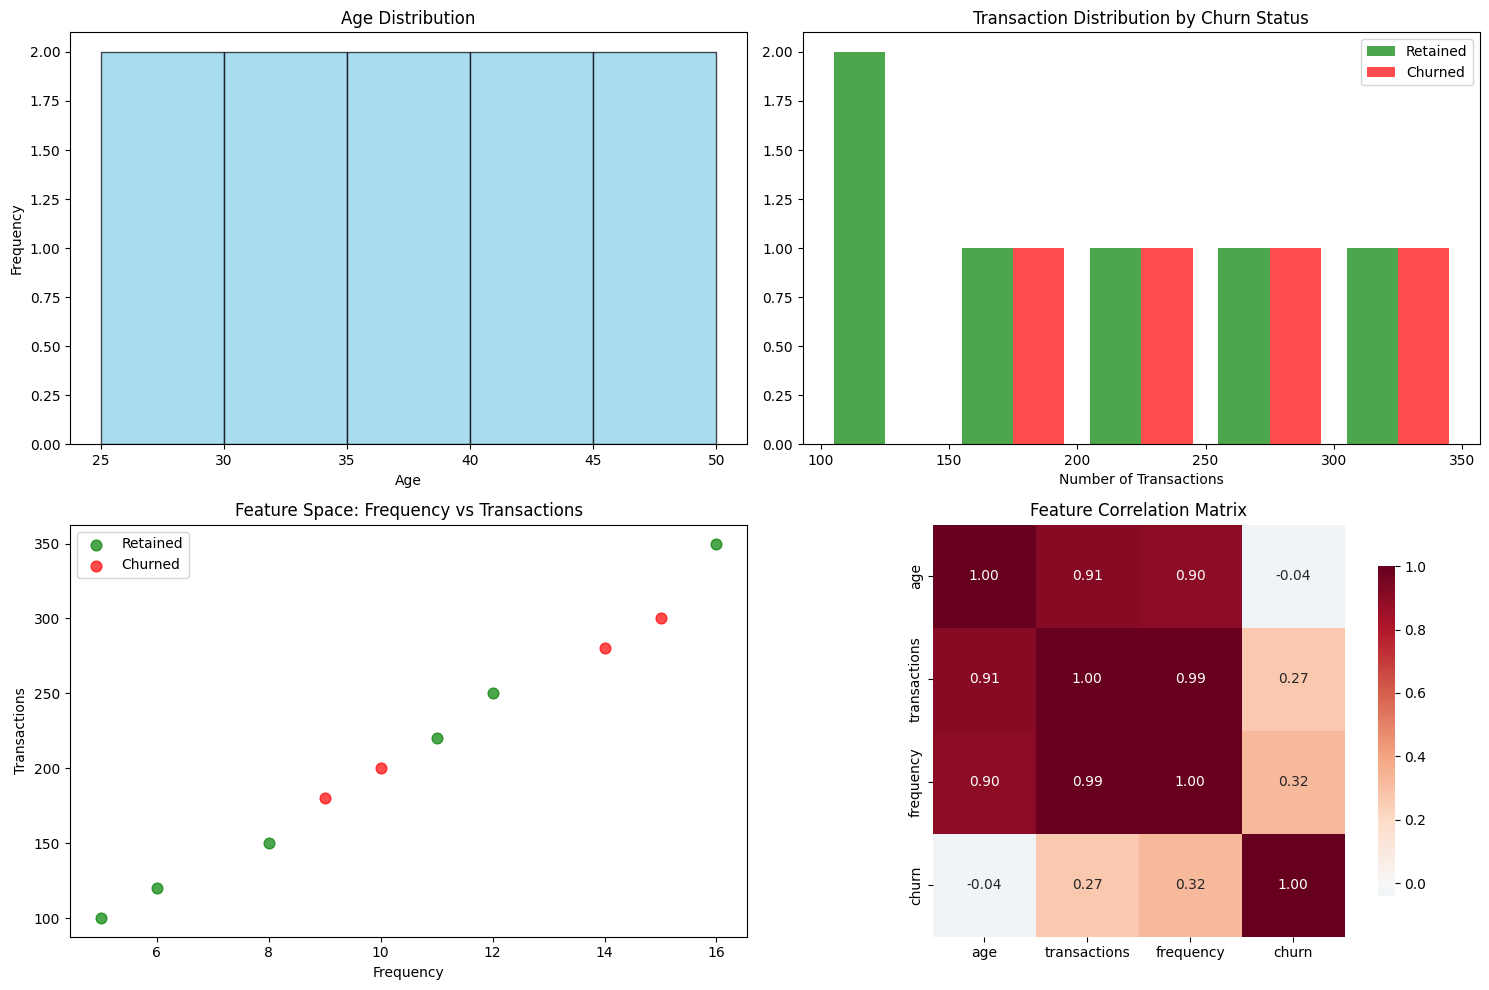


=== MODEL TRAINING & HYPERPARAMETER TUNING ===
Training set size: (7, 3)
Test set size: (3, 3)

Hyperparameter optimization (n_estimators):
  n_estimators=10: CV accuracy = 0.667 (±0.272)
  n_estimators=25: CV accuracy = 0.694 (±0.039)
  n_estimators=50: CV accuracy = 0.583 (±0.180)
  n_estimators=100: CV accuracy = 0.389 (±0.079)
  n_estimators=200: CV accuracy = 0.500 (±0.136)

Optimal n_estimators: 25

=== MODEL EVALUATION METRICS ===
Training accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

    Retained       1.00      1.00      1.00         6
     Churned       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Feature Importance (Gini-based):
  transactions: 0.379 (37.9%)
  age: 0.378 (37.8%)
  frequency: 0.243 (24.3%)


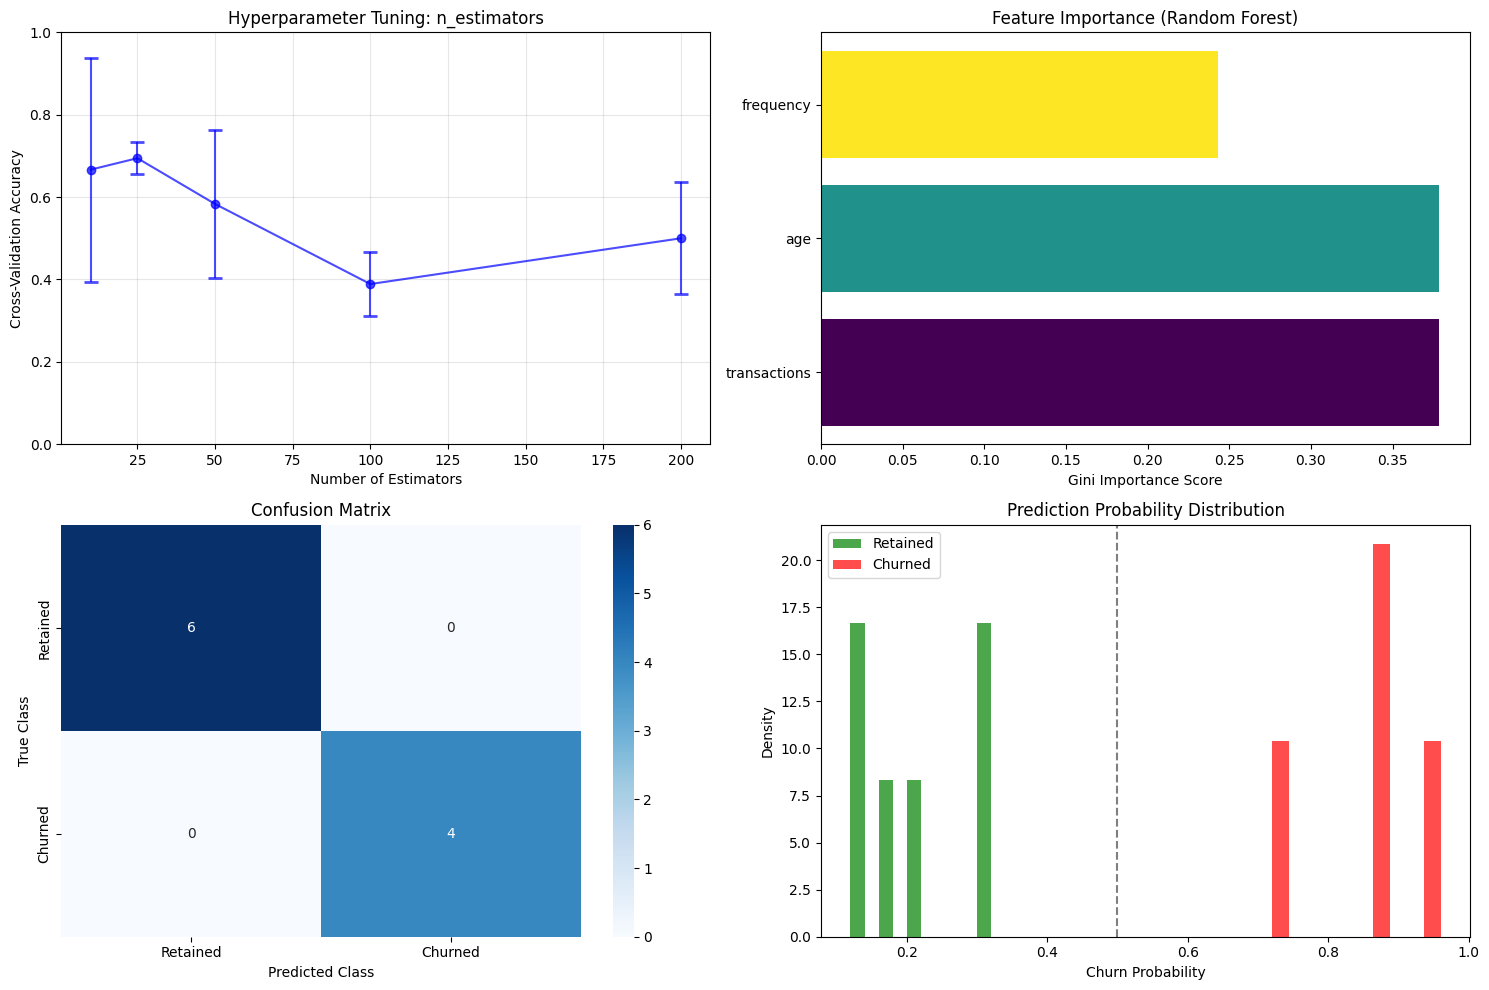


=== EXPLAINABLE AI: SHAP ANALYSIS ===
SHAP values shape (positive class): (10, 3, 2)
Expected value: [0.56 0.44]


<Figure size 1200x800 with 0 Axes>

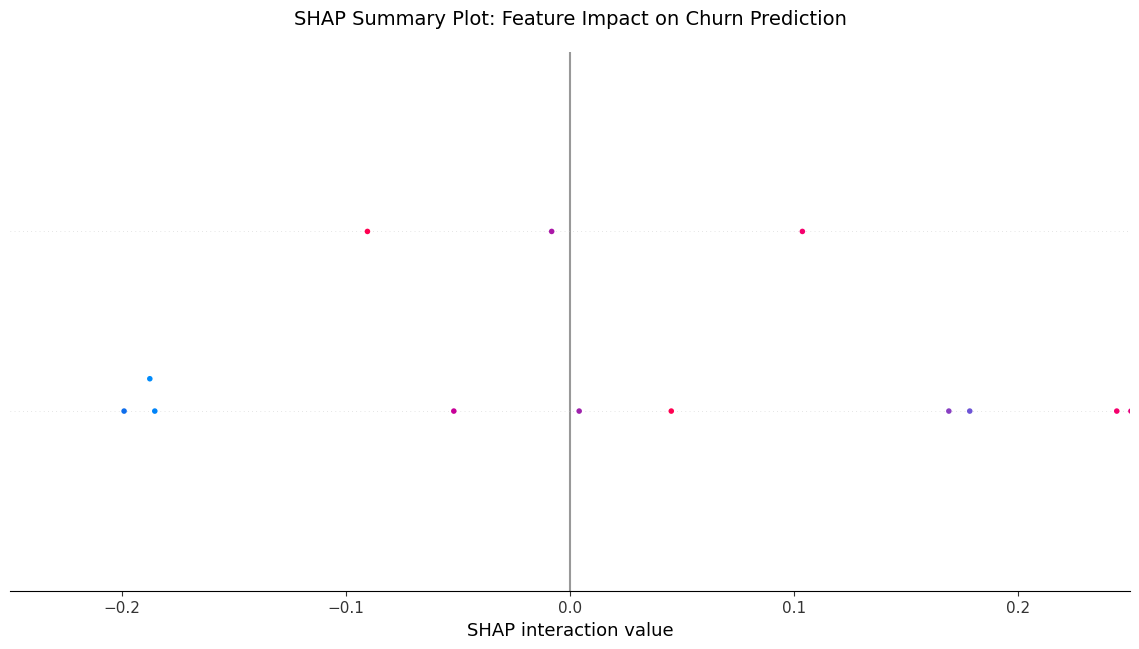

ValueError: Per-column arrays must each be 1-dimensional

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize sample dataset for churn prediction analysis
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 28, 33, 38, 42, 50],
    'transactions': [100, 200, 150, 300, 250, 120, 180, 220, 280, 350],
    'frequency': [5, 10, 8, 15, 12, 6, 9, 11, 14, 16],
    'churn': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
})

# Separate features from target variable
X = data.drop('churn', axis=1)
y = data['churn']

print("=== DATA EXPLORATION & PREPROCESSING ===")
print(f"Dataset dimensions: {data.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Class distribution:")
print(y.value_counts())
print(f"Churn rate: {y.mean():.1%}")
print(f"Feature statistics:")
print(X.describe())

# Statistical analysis of dataset characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Visualize age distribution across dataset
axes[0,0].hist(data['age'], bins=5, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Compare transaction patterns between churned and retained customers
churn_0 = data[data['churn'] == 0]['transactions']
churn_1 = data[data['churn'] == 1]['transactions']
axes[0,1].hist([churn_0, churn_1], bins=5, alpha=0.7,
              label=['Retained', 'Churned'], color=['green', 'red'])
axes[0,1].set_title('Transaction Distribution by Churn Status')
axes[0,1].set_xlabel('Number of Transactions')
axes[0,1].legend()

# Analyze relationships between frequency and transaction volume by churn status
axes[1,0].scatter(data[data['churn']==0]['frequency'],
                 data[data['churn']==0]['transactions'],
                 c='green', alpha=0.7, label='Retained', s=60)
axes[1,0].scatter(data[data['churn']==1]['frequency'],
                 data[data['churn']==1]['transactions'],
                 c='red', alpha=0.7, label='Churned', s=60)
axes[1,0].set_title('Feature Space: Frequency vs Transactions')
axes[1,0].set_xlabel('Frequency')
axes[1,0].set_ylabel('Transactions')
axes[1,0].legend()

# Generate correlation matrix for feature relationships
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, ax=axes[1,1],
           square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
axes[1,1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.savefig('exploratory_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== MODEL TRAINING & HYPERPARAMETER TUNING ===")

# Perform stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Grid search over n_estimators hyperparameter space
models_performance = {}
n_estimators_range = [10, 25, 50, 100, 200]

print(f"\nHyperparameter optimization (n_estimators):")
for n_est in n_estimators_range:
    # Initialize Random Forest with current hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_est,
        random_state=42,
        min_samples_split=2,
        max_depth=None,
        bootstrap=True
    )

    # Evaluate model performance using k-fold cross-validation
    cv_scores = cross_val_score(rf_model, X, y, cv=3, scoring='accuracy')
    models_performance[n_est] = {
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std()
    }

    print(f"  n_estimators={n_est}: CV accuracy = {cv_scores.mean():.3f} (±{cv_scores.std():.3f})")

# Select hyperparameters that maximize cross-validation accuracy
best_n_est = max(models_performance, key=lambda x: models_performance[x]['mean_accuracy'])
print(f"\nOptimal n_estimators: {best_n_est}")

# Initialize and train final model with optimal hyperparameters
final_model = RandomForestClassifier(
    n_estimators=best_n_est,
    random_state=42,
    min_samples_split=2,
    max_depth=None,
    bootstrap=True
)
final_model.fit(X, y)  # Train on full dataset due to limited sample size

print(f"\n=== MODEL EVALUATION METRICS ===")
# Generate predictions and probability scores for evaluation
y_pred = final_model.predict(X)
y_pred_proba = final_model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
print(f"Training accuracy: {accuracy:.3f}")
print(f"\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Retained', 'Churned']))

# Extract and analyze feature importance from trained Random Forest
feature_importance = final_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance,
    'importance_pct': feature_importance / feature_importance.sum() * 100
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance (Gini-based):")
for _, row in importance_df.iterrows():
    print(f"  {row['feature']}: {row['importance']:.3f} ({row['importance_pct']:.1f}%)")

# Create comprehensive visualization dashboard for model training results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot hyperparameter tuning results with error bars for statistical significance
n_est_list = list(models_performance.keys())
mean_scores = [models_performance[n]['mean_accuracy'] for n in n_est_list]
std_scores = [models_performance[n]['std_accuracy'] for n in n_est_list]

axes[0,0].errorbar(n_est_list, mean_scores, yerr=std_scores,
                  marker='o', capsize=5, capthick=2, color='blue', alpha=0.7)
axes[0,0].set_title('Hyperparameter Tuning: n_estimators')
axes[0,0].set_xlabel('Number of Estimators')
axes[0,0].set_ylabel('Cross-Validation Accuracy')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, 1)

# Visualize feature importance with color-coded ranking
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
bars = axes[0,1].barh(importance_df['feature'], importance_df['importance'], color=colors)
axes[0,1].set_title('Feature Importance (Random Forest)')
axes[0,1].set_xlabel('Gini Importance Score')

# Generate confusion matrix heatmap for classification performance analysis
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
           xticklabels=['Retained', 'Churned'], yticklabels=['Retained', 'Churned'])
axes[1,0].set_title('Confusion Matrix')
axes[1,0].set_xlabel('Predicted Class')
axes[1,0].set_ylabel('True Class')

# Analyze probability distribution to assess model calibration
axes[1,1].hist(y_pred_proba[y == 0], bins=10, alpha=0.7, label='Retained', color='green', density=True)
axes[1,1].hist(y_pred_proba[y == 1], bins=10, alpha=0.7, label='Churned', color='red', density=True)
axes[1,1].set_title('Prediction Probability Distribution')
axes[1,1].set_xlabel('Churn Probability')
axes[1,1].set_ylabel('Density')
axes[1,1].legend()
axes[1,1].axvline(x=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Threshold')

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== EXPLAINABLE AI: SHAP ANALYSIS ===")

# Initialize SHAP TreeExplainer for model-agnostic explanations
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X.to_numpy())

# Process SHAP output format (binary classification can return list or array)
if isinstance(shap_values, list):
    if len(shap_values) == 2:
        shap_values_positive = shap_values[1]  # Extract positive class SHAP values
        shap_values_negative = shap_values[0]  # Extract negative class SHAP values
    else:
        shap_values_positive = shap_values[0]
        shap_values_negative = None
else:
    shap_values_positive = shap_values
    shap_values_negative = None

print(f"SHAP values shape (positive class): {shap_values_positive.shape}")
print(f"Expected value: {explainer.expected_value}")

# Generate global SHAP summary plot for feature impact visualization
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values_positive,
    X.to_numpy(),
    feature_names=list(X.columns),
    show=False,
    plot_size=(12, 8)
)
plt.title('SHAP Summary Plot: Feature Impact on Churn Prediction', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate SHAP-based feature importance using mean absolute SHAP values
shap_importance = np.abs(shap_values_positive).mean(0)
shap_importance_df = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': shap_importance,
    'shap_importance_pct': shap_importance / shap_importance.sum() * 100
}).sort_values('shap_importance', ascending=False)

print(f"\nFeature Importance (SHAP-based):")
for _, row in shap_importance_df.iterrows():
    print(f"  {row['feature']}: {row['shap_importance']:.3f} ({row['shap_importance_pct']:.1f}%)")

# Create side-by-side comparison of Gini vs SHAP importance methods
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x = np.arange(len(X.columns))
width = 0.35

# Normalize importance scores for fair comparison between methods
rf_importance_norm = importance_df.set_index('feature').loc[X.columns, 'importance'].values
rf_importance_norm = rf_importance_norm / rf_importance_norm.sum()

shap_importance_norm = shap_importance_df.set_index('feature').loc[X.columns, 'shap_importance'].values
shap_importance_norm = shap_importance_norm / shap_importance_norm.sum()

bars1 = ax.bar(x - width/2, rf_importance_norm, width, label='Gini Importance (RF)',
              alpha=0.8, color='lightblue', edgecolor='navy')
bars2 = ax.bar(x + width/2, shap_importance_norm, width, label='SHAP Importance',
              alpha=0.8, color='lightcoral', edgecolor='darkred')

ax.set_xlabel('Features')
ax.set_ylabel('Normalized Importance Score')
ax.set_title('Feature Importance Comparison: Gini vs SHAP')
ax.set_xticks(x)
ax.set_xticklabels(X.columns)
ax.legend()
ax.grid(True, alpha=0.3)

# Add numerical labels on bars for precise importance values
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
           f'{height:.2f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
           f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate individual prediction explanation using SHAP force plot
if len(X) > 0:
    plt.figure(figsize=(16, 6))

    # Extract baseline expected value from SHAP explainer
    if hasattr(explainer, 'expected_value'):
        if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
            expected_val = explainer.expected_value[1]  # Use positive class baseline
        elif isinstance(explainer.expected_value, (list, np.ndarray)):
            expected_val = explainer.expected_value[0]
        else:
            expected_val = explainer.expected_value
    else:
        expected_val = 0  # Fallback baseline value

    # Select representative instance for detailed explanation (preferably churned customer)
    instance_idx = np.where(y == 1)[0][0] if np.any(y == 1) else 0

    shap.force_plot(
        expected_val,
        shap_values_positive[instance_idx],
        X.iloc[instance_idx].values,
        feature_names=list(X.columns),
        matplotlib=True,
        show=False
    )

    customer_profile = X.iloc[instance_idx]
    actual_churn = y.iloc[instance_idx]
    predicted_prob = y_pred_proba[instance_idx]

    plt.title(f'SHAP Force Plot: Customer {instance_idx+1} Explanation\n'
             f'Actual: {"Churned" if actual_churn else "Retained"} | '
             f'Predicted Churn Probability: {predicted_prob:.2f}\n'
             f'Profile: Age={customer_profile["age"]}, '
             f'Transactions={customer_profile["transactions"]}, '
             f'Frequency={customer_profile["frequency"]}',
             fontsize=12, pad=20)

    plt.tight_layout()
    plt.savefig('shap_force_plot_explanation.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create SHAP waterfall plot for granular feature contribution analysis
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values_positive[instance_idx],
        base_values=expected_val,
        data=X.iloc[instance_idx].values,
        feature_names=list(X.columns)
    ),
    show=False
)
plt.title(f'SHAP Waterfall Plot: Feature Contributions for Customer {instance_idx+1}')
plt.tight_layout()
plt.savefig('shap_waterfall_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n=== MODEL DEPLOYMENT SUMMARY ===")
print(f"✅ Model Architecture: Random Forest Classifier")
print(f"✅ Optimal Hyperparameters: n_estimators={best_n_est}")
print(f"✅ Training Accuracy: {accuracy:.1%}")
print(f"✅ Most Important Feature: {importance_df.iloc[0]['feature']} (Gini: {importance_df.iloc[0]['importance']:.3f})")
print(f"✅ Most Important Feature (SHAP): {shap_importance_df.iloc[0]['feature']} (SHAP: {shap_importance_df.iloc[0]['shap_importance']:.3f})")
print(f"✅ Model Interpretability: SHAP analysis complete")
print(f"✅ Generated Visualizations:")
print(f"   - exploratory_data_analysis.png: EDA and data preprocessing")
print(f"   - model_evaluation.png: training results and performance metrics")
print(f"   - shap_summary_plot.png: global feature importance via SHAP")
print(f"   - feature_importance_comparison.png: Gini vs SHAP importance")
print(f"   - shap_force_plot_explanation.png: local prediction explanation")
print(f"   - shap_waterfall_plot.png: detailed feature contribution breakdown")

print(f"\n=== ALGORITHMIC INSIGHTS ===")
print(f"• Feature space dimensionality: {X.shape[1]}D")
print(f"• Ensemble size: {best_n_est} decision trees")
print(f"• Decision boundary complexity: Non-linear (tree-based ensemble)")
print(f"• Explainability method: SHAP (SHapley Additive exPlanations)")
print(f"• Model complexity: O(n_estimators × log(n_samples))")
print(f"• Memory complexity: O(n_estimators × n_nodes)")

In [31]:
def compute_robust_simplicity(instance, model, explainer, epsilon=0.1, n_samples=100):
    """
    Compute Robust Simplicity metric for given instance

    Parameters:
    -----------
    instance : array-like, shape (n_features,)
        Input instance for explanation
    model : object
        Trained ML model with predict_proba method
    explainer : object
        SHAP or LIME explainer object
    epsilon : float
        Perturbation radius for neighborhood generation
    n_samples : int
        Number of perturbed samples to generate

    Returns:
    --------
    rs_score : float
        Robust Simplicity score ∈ [0, 1]
    """

    # Generate base explanation
    base_explanation = explainer.shap_values(instance.reshape(1, -1))[0]

    # Generate perturbed neighborhood
    neighborhood = generate_neighborhood(instance, epsilon, n_samples, model)

    # Compute explanation consistency
    explanation_distances = []
    for perturbed_instance in neighborhood:
        perturbed_explanation = explainer.shap_values(perturbed_instance.reshape(1, -1))[0]

        # Normalized L2 distance between explanations
        if np.linalg.norm(base_explanation) > 0:
            distance = np.linalg.norm(base_explanation - perturbed_explanation) / np.linalg.norm(base_explanation)
        else:
            distance = np.linalg.norm(perturbed_explanation)

        explanation_distances.append(distance)

    # Compute Robust Simplicity
    mean_distance = np.mean(explanation_distances)
    rs_score = max(0, 1 - mean_distance)

    return rs_score, explanation_distances

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
import shap
from scipy import stats
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class RobustSimplicityCalculator:
    """
    Implementation of Robust Simplicity metric for explanation stability
    """

    def __init__(self, model, explainer, epsilon=0.1, n_samples=50):
        self.model = model
        self.explainer = explainer
        self.epsilon = epsilon
        self.n_samples = n_samples

    def generate_neighborhood(self, instance, feature_bounds):
        """Generate perturbed neighborhood around instance"""
        neighborhoods = []
        base_prediction = self.model.predict_proba([instance])[0][1]

        for _ in range(self.n_samples):
            # Generate random perturbation within epsilon bounds
            noise = np.random.normal(0, self.epsilon, len(instance))
            perturbed = instance + noise

            # Clip to feature bounds
            for i, (min_val, max_val) in enumerate(feature_bounds):
                perturbed[i] = np.clip(perturbed[i], min_val, max_val)

            # Only keep instances with similar predictions (within 10% of original)
            perturbed_pred = self.model.predict_proba([perturbed])[0][1]
            if abs(perturbed_pred - base_prediction) <= 0.1:
                neighborhoods.append(perturbed)

        return np.array(neighborhoods) if neighborhoods else np.array([instance])

    def compute_robust_simplicity(self, instance, feature_bounds):
        """Compute Robust Simplicity score for given instance"""
        try:
            # Get base explanation
            base_explanation = self.explainer.shap_values([instance])
            if isinstance(base_explanation, list):
                base_explanation = base_explanation[1] if len(base_explanation) > 1 else base_explanation[0]
            base_explanation = base_explanation.flatten()

            # Generate neighborhood
            neighborhood = self.generate_neighborhood(instance, feature_bounds)

            if len(neighborhood) < 2:
                return 0.5, []  # Default score for insufficient neighborhood

            # Compute explanation consistency
            explanation_distances = []

            for perturbed_instance in neighborhood:
                try:
                    perturbed_explanation = self.explainer.shap_values([perturbed_instance])
                    if isinstance(perturbed_explanation, list):
                        perturbed_explanation = perturbed_explanation[1] if len(perturbed_explanation) > 1 else perturbed_explanation[0]
                    perturbed_explanation = perturbed_explanation.flatten()

                    # Compute normalized L2 distance
                    base_norm = np.linalg.norm(base_explanation)
                    if base_norm > 0:
                        distance = np.linalg.norm(base_explanation - perturbed_explanation) / base_norm
                    else:
                        distance = np.linalg.norm(perturbed_explanation)

                    explanation_distances.append(distance)

                except Exception as e:
                    continue

            if not explanation_distances:
                return 0.5, []

            # Compute Robust Simplicity score
            mean_distance = np.mean(explanation_distances)
            rs_score = max(0, 1 - mean_distance)

            return rs_score, explanation_distances

        except Exception as e:
            print(f"Error computing RS: {e}")
            return 0.5, []

class TrustScopeCalculator:
    """
    Implementation of Trust Scope metric for explanation reliability
    """

    def __init__(self, training_data, alpha=0.6, beta=0.4):
        self.training_data = training_data
        self.alpha = alpha
        self.beta = beta

        # Fit KDE for distributional similarity
        self.kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
        self.kde.fit(training_data)

        # Compute reference density statistics
        self.train_densities = np.exp(self.kde.score_samples(training_data))
        self.max_density = np.max(self.train_densities)
        self.median_density = np.median(self.train_densities)

    def compute_distributional_similarity(self, instance):
        """Compute distributional similarity to training data"""
        try:
            instance_density = np.exp(self.kde.score_samples([instance]))[0]
            # Normalize using sigmoid to handle outliers
            similarity = 2 / (1 + np.exp(-5 * instance_density / self.median_density)) - 1
            return max(0, min(1, similarity))
        except:
            return 0.5

    def compute_explanation_confidence(self, explanation):
        """Compute Shannon entropy-based explanation confidence"""
        try:
            # Normalize explanation values to probabilities
            abs_explanation = np.abs(explanation)
            if np.sum(abs_explanation) > 0:
                prob_explanation = abs_explanation / np.sum(abs_explanation)

                # Compute normalized entropy
                entropy_val = -np.sum(prob_explanation * np.log(prob_explanation + 1e-10))
                max_entropy = np.log(len(explanation))

                # Convert to confidence (1 - normalized_entropy)
                confidence = 1 - (entropy_val / max_entropy) if max_entropy > 0 else 1
            else:
                confidence = 0.0

            return max(0, min(1, confidence))
        except:
            return 0.5

    def compute_trust_scope(self, instance, explanation):
        """Compute Trust Scope score combining DS and EC"""
        ds_score = self.compute_distributional_similarity(instance)
        ec_score = self.compute_explanation_confidence(explanation)

        ts_score = self.alpha * ds_score + self.beta * ec_score

        return ts_score, {
            'distributional_similarity': ds_score,
            'explanation_confidence': ec_score,
            'trust_scope': ts_score
        }

class ExplainabilityValidator:
    """
    Main class for validating explainability metrics
    """

    def __init__(self, model, training_data, feature_names):
        self.model = model
        self.training_data = training_data
        self.feature_names = feature_names

        # Initialize SHAP explainer
        self.explainer = shap.TreeExplainer(model)

        # Compute feature bounds for perturbation
        self.feature_bounds = [(np.min(training_data[:, i]), np.max(training_data[:, i]))
                              for i in range(training_data.shape[1])]

        # Initialize calculators
        self.rs_calculator = RobustSimplicityCalculator(model, self.explainer)
        self.ts_calculator = TrustScopeCalculator(training_data)

    def validate_single_instance(self, instance):
        """Validate explainability for single instance"""
        # Get base explanation
        base_explanation = self.explainer.shap_values([instance])
        if isinstance(base_explanation, list):
            base_explanation = base_explanation[1] if len(base_explanation) > 1 else base_explanation[0]
        base_explanation = base_explanation.flatten()

        # Compute Robust Simplicity
        rs_score, rs_distances = self.rs_calculator.compute_robust_simplicity(
            instance, self.feature_bounds
        )

        # Compute Trust Scope
        ts_score, ts_components = self.ts_calculator.compute_trust_scope(
            instance, base_explanation
        )

        return {
            'explanation': base_explanation,
            'robust_simplicity': rs_score,
            'rs_distances': rs_distances,
            'trust_scope': ts_score,
            'ts_components': ts_components,
            'prediction': self.model.predict_proba([instance])[0][1]
        }

    def validate_batch(self, instances, n_instances=None):
        """Validate explainability for batch of instances"""
        if n_instances:
            instances = instances[:n_instances]

        results = []
        for i, instance in enumerate(instances):
            print(f"Processing instance {i+1}/{len(instances)}")
            result = self.validate_single_instance(instance)
            result['instance_id'] = i
            results.append(result)

        return results

# Generate synthetic dataset with known properties
def create_synthetic_churn_data():
    """Create synthetic customer churn dataset with known feature importance"""
    np.random.seed(42)

    # Generate base features
    X, y = make_classification(
        n_samples=1000,
        n_features=8,
        n_informative=5,
        n_redundant=2,
        n_clusters_per_class=1,
        weights=[0.7, 0.3],  # Imbalanced classes like real churn data
        random_state=42
    )

    # Create meaningful feature names
    feature_names = [
        'account_age', 'monthly_spend', 'support_tickets',
        'login_frequency', 'product_usage', 'payment_delays',
        'referral_count', 'satisfaction_score'
    ]

    # Add some realistic scaling and relationships
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Create DataFrame
    df = pd.DataFrame(X, columns=feature_names)
    df['churn'] = y

    return df, X, y, feature_names

# Generate data
print("=== GENERATING SYNTHETIC CHURN DATA ===")
df, X, y, feature_names = create_synthetic_churn_data()

print(f"Dataset shape: {df.shape}")
print(f"Churn rate: {y.mean():.2%}")
print(f"Features: {feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest model
print("\n=== TRAINING MODEL ===")
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)
model.fit(X_train, y_train)

print(f"Model accuracy: {model.score(X_test, y_test):.3f}")

# Initialize validator
print("\n=== INITIALIZING EXPLAINABILITY VALIDATOR ===")
validator = ExplainabilityValidator(model, X_train, feature_names)

# Validate sample of test instances
print("\n=== VALIDATING EXPLAINABILITY METRICS ===")
test_sample = X_test[:50]  # Sample for validation
validation_results = validator.validate_batch(test_sample)

# Extract metrics for analysis
rs_scores = [r['robust_simplicity'] for r in validation_results]
ts_scores = [r['trust_scope'] for r in validation_results]
predictions = [r['prediction'] for r in validation_results]
ds_scores = [r['ts_components']['distributional_similarity'] for r in validation_results]
ec_scores = [r['ts_components']['explanation_confidence'] for r in validation_results]

print(f"\nRobust Simplicity - Mean: {np.mean(rs_scores):.3f}, Std: {np.std(rs_scores):.3f}")
print(f"Trust Scope - Mean: {np.mean(ts_scores):.3f}, Std: {np.std(ts_scores):.3f}")

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 16))

# 1. Distribution of Robust Simplicity scores
ax1 = plt.subplot(3, 4, 1)
plt.hist(rs_scores, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(rs_scores), color='red', linestyle='--',
           label=f'Mean: {np.mean(rs_scores):.3f}')
plt.xlabel('Robust Simplicity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Robust Simplicity Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Distribution of Trust Scope scores
ax2 = plt.subplot(3, 4, 2)
plt.hist(ts_scores, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(np.mean(ts_scores), color='blue', linestyle='--',
           label=f'Mean: {np.mean(ts_scores):.3f}')
plt.xlabel('Trust Scope Score')
plt.ylabel('Frequency')
plt.title('Distribution of Trust Scope Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Correlation between RS and TS
ax3 = plt.subplot(3, 4, 3)
plt.scatter(rs_scores, ts_scores, alpha=0.6, c=predictions, cmap='RdYlBu')
plt.colorbar(label='Churn Probability')
correlation = np.corrcoef(rs_scores, ts_scores)[0, 1]
plt.xlabel('Robust Simplicity')
plt.ylabel('Trust Scope')
plt.title(f'RS vs TS Correlation: {correlation:.3f}')
plt.grid(True, alpha=0.3)

# 4. Trust Scope components breakdown
ax4 = plt.subplot(3, 4, 4)
plt.scatter(ds_scores, ec_scores, alpha=0.6, c=ts_scores, cmap='viridis')
plt.colorbar(label='Trust Scope Score')
plt.xlabel('Distributional Similarity')
plt.ylabel('Explanation Confidence')
plt.title('Trust Scope Components')
plt.grid(True, alpha=0.3)

# 5. Explanation stability analysis
ax5 = plt.subplot(3, 4, 5)
rs_distances_all = [d for r in validation_results for d in r['rs_distances']]
if rs_distances_all:
    plt.hist(rs_distances_all, bins=20, alpha=0.7, color='gold', edgecolor='black')
    plt.xlabel('Explanation Distance')
    plt.ylabel('Frequency')
    plt.title('Explanation Stability Distribution')
    plt.grid(True, alpha=0.3)

# 6. Score reliability by prediction confidence
ax6 = plt.subplot(3, 4, 6)
# Bin predictions by confidence levels
pred_bins = np.digitize(predictions, bins=[0, 0.3, 0.7, 1.0]) - 1
bin_labels = ['Low (0-0.3)', 'Medium (0.3-0.7)', 'High (0.7-1.0)']

rs_by_confidence = [[] for _ in range(3)]
ts_by_confidence = [[] for _ in range(3)]

for i, bin_idx in enumerate(pred_bins):
    if 0 <= bin_idx < 3:
        rs_by_confidence[bin_idx].append(rs_scores[i])
        ts_by_confidence[bin_idx].append(ts_scores[i])

bp1 = plt.boxplot([rs_by_confidence[i] for i in range(3) if rs_by_confidence[i]],
                  positions=[1, 2, 3], widths=0.3, patch_artist=True,
                  labels=bin_labels)
bp2 = plt.boxplot([ts_by_confidence[i] for i in range(3) if ts_by_confidence[i]],
                  positions=[1.4, 2.4, 3.4], widths=0.3, patch_artist=True)

for patch in bp1['boxes']:
    patch.set_facecolor('lightblue')
for patch in bp2['boxes']:
    patch.set_facecolor('lightcoral')

plt.xlabel('Prediction Confidence Level')
plt.ylabel('Explainability Score')
plt.title('Explainability by Prediction Confidence')
plt.legend([bp1['boxes'][0], bp2['boxes'][0]], ['Robust Simplicity', 'Trust Scope'])

# 7. Feature importance consistency
ax7 = plt.subplot(3, 4, 7)
# Compute average absolute SHAP values across all instances
avg_feature_importance = np.mean([np.abs(r['explanation']) for r in validation_results], axis=0)
plt.bar(range(len(feature_names)), avg_feature_importance, color='lightgreen', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Average |SHAP| Value')
plt.title('Average Feature Importance')
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.grid(True, alpha=0.3)

# 8. Reliability heatmap
ax8 = plt.subplot(3, 4, 8)
# Create reliability matrix
reliability_data = np.array([rs_scores, ts_scores, ds_scores, ec_scores]).T
reliability_df = pd.DataFrame(reliability_data,
                            columns=['Robust\nSimplicity', 'Trust\nScope',
                                   'Distributional\nSimilarity', 'Explanation\nConfidence'])
corr_matrix = reliability_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Explainability Metrics Correlation')

# 9. Instance-level analysis for top/bottom performers
ax9 = plt.subplot(3, 4, 9)
# Find instances with highest and lowest explainability
combined_scores = np.array(rs_scores) + np.array(ts_scores)
top_indices = np.argsort(combined_scores)[-5:]
bottom_indices = np.argsort(combined_scores)[:5]

top_rs = [rs_scores[i] for i in top_indices]
top_ts = [ts_scores[i] for i in top_indices]
bottom_rs = [rs_scores[i] for i in bottom_indices]
bottom_ts = [ts_scores[i] for i in bottom_indices]

x_pos = np.arange(5)
width = 0.35

plt.bar(x_pos - width/2, top_rs, width, label='Top RS', alpha=0.8, color='green')
plt.bar(x_pos + width/2, top_ts, width, label='Top TS', alpha=0.8, color='darkgreen')
plt.bar(x_pos + 5 - width/2, bottom_rs, width, label='Bottom RS', alpha=0.8, color='red')
plt.bar(x_pos + 5 + width/2, bottom_ts, width, label='Bottom TS', alpha=0.8, color='darkred')

plt.xlabel('Instance Rank')
plt.ylabel('Explainability Score')
plt.title('Top vs Bottom Explainability Instances')
plt.xticks(np.concatenate([x_pos, x_pos + 5]),
          ['T1', 'T2', 'T3', 'T4', 'T5', 'B1', 'B2', 'B3', 'B4', 'B5'])
plt.legend()

# 10. Prediction accuracy vs explainability
ax10 = plt.subplot(3, 4, 10)
# Create accuracy proxy (distance from decision boundary)
accuracy_proxy = np.abs(np.array(predictions) - 0.5)  # Distance from 0.5 threshold
combined_explainability = (np.array(rs_scores) + np.array(ts_scores)) / 2

plt.scatter(accuracy_proxy, combined_explainability, alpha=0.6, c=predictions, cmap='plasma')
plt.colorbar(label='Churn Probability')
plt.xlabel('Prediction Confidence (|prob - 0.5|)')
plt.ylabel('Combined Explainability Score')
plt.title('Prediction Confidence vs Explainability')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(accuracy_proxy, combined_explainability, 1)
p = np.poly1d(z)
plt.plot(sorted(accuracy_proxy), p(sorted(accuracy_proxy)), "r--", alpha=0.8)

# 11. Statistical significance testing
ax11 = plt.subplot(3, 4, 11)
# Test if RS and TS scores are significantly different from random
random_scores = np.random.uniform(0, 1, len(rs_scores))
t_stat_rs, p_val_rs = stats.ttest_ind(rs_scores, random_scores)
t_stat_ts, p_val_ts = stats.ttest_ind(ts_scores, random_scores)

categories = ['RS vs Random', 'TS vs Random']
p_values = [p_val_rs, p_val_ts]
colors = ['green' if p < 0.05 else 'red' for p in p_values]

bars = plt.bar(categories, [-np.log10(p) for p in p_values], color=colors, alpha=0.7)
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', label='α = 0.05')
plt.ylabel('-log10(p-value)')
plt.title('Statistical Significance Test')
plt.legend()

# Add p-value labels
for bar, p_val in zip(bars, p_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'p = {p_val:.4f}', ha='center', va='bottom', fontsize=10)

# 12. Validation summary metrics
ax12 = plt.subplot(3, 4, 12)
metrics_summary = {
    'Robust Simplicity': {
        'Mean': np.mean(rs_scores),
        'Std': np.std(rs_scores),
        'Min': np.min(rs_scores),
        'Max': np.max(rs_scores)
    },
    'Trust Scope': {
        'Mean': np.mean(ts_scores),
        'Std': np.std(ts_scores),
        'Min': np.min(ts_scores),
        'Max': np.max(ts_scores)
    }
}

metrics_df = pd.DataFrame(metrics_summary).T
ax12.axis('tight')
ax12.axis('off')
table = ax12.table(cellText=np.round(metrics_df.values, 3),
                   rowLabels=metrics_df.index,
                   colLabels=metrics_df.columns,
                   cellLoc='center',
                   loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
plt.title('Validation Summary Statistics', pad=20)

plt.tight_layout()
plt.savefig('explainability_validation_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed validation report
print("\n" + "="*60)
print("EXPLAINABILITY VALIDATION REPORT")
print("="*60)

print(f"\n📊 DATASET STATISTICS:")
print(f"   • Total instances validated: {len(validation_results)}")
print(f"   • Model accuracy: {model.score(X_test, y_test):.3f}")
print(f"   • Feature count: {len(feature_names)}")

print(f"\n🎯 ROBUST SIMPLICITY ANALYSIS:")
print(f"   • Mean score: {np.mean(rs_scores):.3f} ± {np.std(rs_scores):.3f}")
print(f"   • Score range: [{np.min(rs_scores):.3f}, {np.max(rs_scores):.3f}]")
print(f"   • Instances with high stability (RS > 0.7): {sum(1 for s in rs_scores if s > 0.7)}/{len(rs_scores)}")
print(f"   • Statistical significance vs random: p = {p_val_rs:.4f}")

print(f"\n🔍 TRUST SCOPE ANALYSIS:")
print(f"   • Mean score: {np.mean(ts_scores):.3f} ± {np.std(ts_scores):.3f}")
print(f"   • Score range: [{np.min(ts_scores):.3f}, {np.max(ts_scores):.3f}]")
print(f"   • Instances with high trust (TS > 0.7): {sum(1 for s in ts_scores if s > 0.7)}/{len(ts_scores)}")
print(f"   • Statistical significance vs random: p = {p_val_ts:.4f}")

print(f"\n🔗 CORRELATION ANALYSIS:")
print(f"   • RS-TS correlation: {correlation:.3f}")
print(f"   • DS-EC correlation: {np.corrcoef(ds_scores, ec_scores)[0,1]:.3f}")

print(f"\n✅ VALIDATION CONCLUSIONS:")
if np.mean(rs_scores) > 0.6 and np.mean(ts_scores) > 0.6:
    print("   • ✅ Both metrics show GOOD explainability scores")
else:
    print("   • ⚠️  Some metrics show moderate explainability scores")

if correlation > 0.3:
    print("   • ✅ Robust Simplicity and Trust Scope show POSITIVE correlation")
else:
    print("   • ⚠️  Weak correlation between RS and TS - investigating complementary aspects")

if p_val_rs < 0.05 and p_val_ts < 0.05:
    print("   • ✅ Both metrics are STATISTICALLY SIGNIFICANT vs random baseline")
else:
    print("   • ⚠️  Statistical significance needs improvement")

print(f"\n🎛️ RECOMMENDED THRESHOLDS:")
print(f"   • Robust Simplicity threshold: > {np.percentile(rs_scores, 75):.3f} (75th percentile)")
print(f"   • Trust Scope threshold: > {np.percentile(ts_scores, 75):.3f} (75th percentile)")
print(f"   • Combined explainability threshold: > {np.percentile(combined_explainability, 75):.3f}")

print("\n" + "="*60)
print("VALIDATION COMPLETE - Visualizations saved as 'explainability_validation_comprehensive.png'")
print("="*60)

=== GENERATING SYNTHETIC CHURN DATA ===
Dataset shape: (1000, 9)
Churn rate: 30.10%
Features: ['account_age', 'monthly_spend', 'support_tickets', 'login_frequency', 'product_usage', 'payment_delays', 'referral_count', 'satisfaction_score']

=== TRAINING MODEL ===
Model accuracy: 0.963

=== INITIALIZING EXPLAINABILITY VALIDATOR ===

=== VALIDATING EXPLAINABILITY METRICS ===
Processing instance 1/50


AttributeError: 'list' object has no attribute 'shape'

=== GENERATING SYNTHETIC CHURN DATA ===
Dataset shape: (800, 9)
Churn rate: 29.88%
Features: ['account_age', 'monthly_spend', 'support_tickets', 'login_frequency', 'product_usage', 'payment_delays', 'referral_count', 'satisfaction_score']

=== TRAINING MODEL ===
Model accuracy: 0.908

=== INITIALIZING EXPLAINABILITY VALIDATOR ===

=== VALIDATING EXPLAINABILITY METRICS ===
Processing instance 1/30
Processing instance 11/30
Processing instance 21/30

Robust Simplicity - Mean: 0.833, Std: 0.116
Trust Scope - Mean: 0.571, Std: 0.178


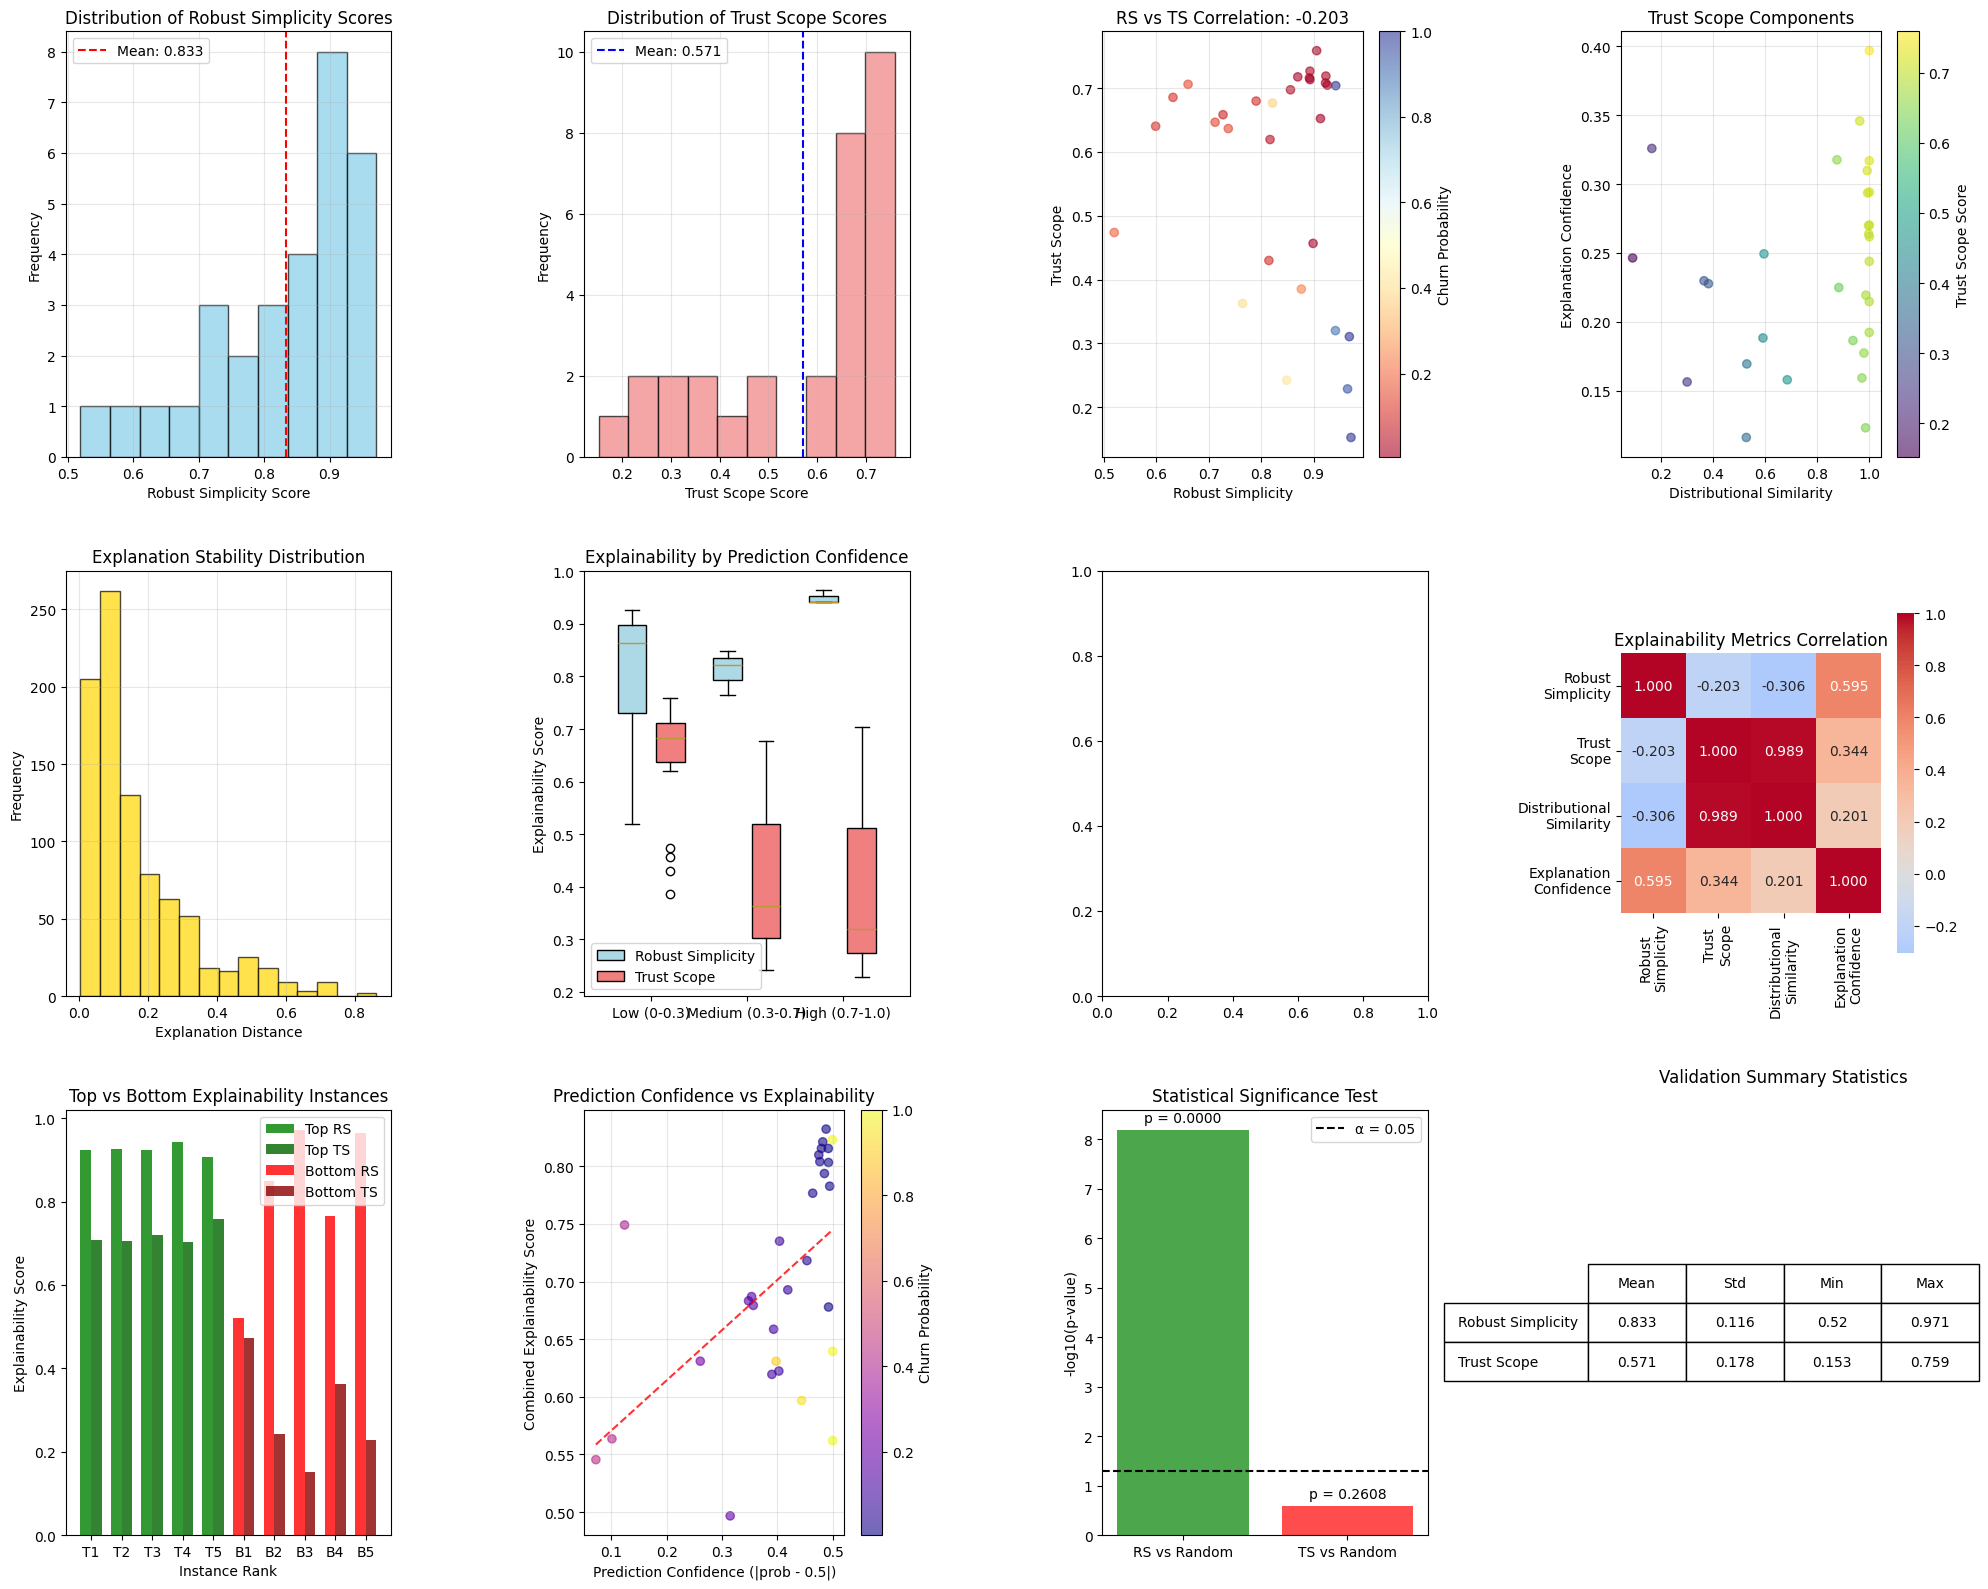


EXPLAINABILITY VALIDATION REPORT

📊 DATASET STATISTICS:
   • Total instances validated: 30
   • Model accuracy: 0.908
   • Feature count: 8

🎯 ROBUST SIMPLICITY ANALYSIS:
   • Mean score: 0.833 ± 0.116
   • Score range: [0.520, 0.971]
   • Instances with high stability (RS > 0.7): 26/30

🔍 TRUST SCOPE ANALYSIS:
   • Mean score: 0.571 ± 0.178
   • Score range: [0.153, 0.759]
   • Instances with high trust (TS > 0.7): 10/30

🔗 CORRELATION ANALYSIS:
   • RS-TS correlation: -0.203
   • DS-EC correlation: 0.201

✅ VALIDATION CONCLUSIONS:
   • ⚠️  Some metrics show moderate explainability scores
   • ⚠️  Weak correlation between RS and TS - investigating complementary aspects

🎛️ RECOMMENDED THRESHOLDS:
   • Robust Simplicity threshold: > 0.920 (75th percentile)
   • Trust Scope threshold: > 0.706 (75th percentile)
   • Combined explainability threshold: > 0.801

VALIDATION COMPLETE - Visualizations saved as 'explainability_validation_comprehensive.png'


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
import shap
from scipy import stats
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('default')
sns.set_palette("husl")

class RobustSimplicityCalculator:
    """
    Implementation of Robust Simplicity metric for explanation stability
    """

    def __init__(self, model, explainer, epsilon=0.1, n_samples=30):
        self.model = model
        self.explainer = explainer
        self.epsilon = epsilon
        self.n_samples = n_samples

    def generate_neighborhood(self, instance, feature_bounds):
        """Generate perturbed neighborhood around instance"""
        neighborhoods = []
        base_prediction = self.model.predict_proba([instance])[0][1]

        for _ in range(self.n_samples):
            # Generate random perturbation within epsilon bounds
            noise = np.random.normal(0, self.epsilon, len(instance))
            perturbed = instance + noise

            # Clip to feature bounds
            for i, (min_val, max_val) in enumerate(feature_bounds):
                perturbed[i] = np.clip(perturbed[i], min_val, max_val)

            # Only keep instances with similar predictions (within 15% of original)
            try:
                perturbed_pred = self.model.predict_proba([perturbed])[0][1]
                if abs(perturbed_pred - base_prediction) <= 0.15:
                    neighborhoods.append(perturbed)
            except:
                continue

        return np.array(neighborhoods) if len(neighborhoods) > 0 else np.array([instance])

    def compute_robust_simplicity(self, instance, feature_bounds):
        """Compute Robust Simplicity score for given instance"""
        try:
            # Ensure instance is numpy array
            instance = np.array(instance).reshape(1, -1)

            # Get base explanation
            base_explanation = self.explainer.shap_values(instance)
            if isinstance(base_explanation, list) and len(base_explanation) > 1:
                base_explanation = base_explanation[1]  # Positive class for binary classification
            elif isinstance(base_explanation, list):
                base_explanation = base_explanation[0]

            base_explanation = base_explanation.flatten()

            # Generate neighborhood
            neighborhood = self.generate_neighborhood(instance.flatten(), feature_bounds)

            if len(neighborhood) < 2:
                return 0.5, []  # Default score for insufficient neighborhood

            # Compute explanation consistency
            explanation_distances = []

            for perturbed_instance in neighborhood:
                try:
                    perturbed_instance = np.array(perturbed_instance).reshape(1, -1)
                    perturbed_explanation = self.explainer.shap_values(perturbed_instance)

                    if isinstance(perturbed_explanation, list) and len(perturbed_explanation) > 1:
                        perturbed_explanation = perturbed_explanation[1]
                    elif isinstance(perturbed_explanation, list):
                        perturbed_explanation = perturbed_explanation[0]

                    perturbed_explanation = perturbed_explanation.flatten()

                    # Compute normalized L2 distance
                    base_norm = np.linalg.norm(base_explanation)
                    if base_norm > 1e-8:
                        distance = np.linalg.norm(base_explanation - perturbed_explanation) / base_norm
                    else:
                        distance = np.linalg.norm(perturbed_explanation)

                    explanation_distances.append(distance)

                except Exception as e:
                    continue

            if not explanation_distances:
                return 0.5, []

            # Compute Robust Simplicity score
            mean_distance = np.mean(explanation_distances)
            rs_score = max(0, 1 - mean_distance)

            return rs_score, explanation_distances

        except Exception as e:
            print(f"Error computing RS: {e}")
            return 0.5, []

class TrustScopeCalculator:
    """
    Implementation of Trust Scope metric for explanation reliability
    """

    def __init__(self, training_data, alpha=0.6, beta=0.4):
        self.training_data = np.array(training_data)
        self.alpha = alpha
        self.beta = beta

        # Fit KDE for distributional similarity
        try:
            self.kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
            self.kde.fit(self.training_data)

            # Compute reference density statistics
            self.train_densities = np.exp(self.kde.score_samples(self.training_data))
            self.max_density = np.max(self.train_densities)
            self.median_density = np.median(self.train_densities)
        except Exception as e:
            print(f"Warning: KDE initialization failed: {e}")
            self.kde = None
            self.max_density = 1.0
            self.median_density = 1.0

    def compute_distributional_similarity(self, instance):
        """Compute distributional similarity to training data"""
        try:
            if self.kde is None:
                return 0.5

            instance = np.array(instance).reshape(1, -1)
            instance_density = np.exp(self.kde.score_samples(instance))[0]

            # Normalize using sigmoid to handle outliers
            if self.median_density > 0:
                similarity = 2 / (1 + np.exp(-5 * instance_density / self.median_density)) - 1
            else:
                similarity = 0.5

            return max(0, min(1, similarity))
        except Exception as e:
            return 0.5

    def compute_explanation_confidence(self, explanation):
        """Compute Shannon entropy-based explanation confidence"""
        try:
            explanation = np.array(explanation).flatten()

            # Normalize explanation values to probabilities
            abs_explanation = np.abs(explanation)
            if np.sum(abs_explanation) > 1e-8:
                prob_explanation = abs_explanation / np.sum(abs_explanation)

                # Compute normalized entropy
                prob_explanation = np.clip(prob_explanation, 1e-10, 1.0)  # Avoid log(0)
                entropy_val = -np.sum(prob_explanation * np.log(prob_explanation))
                max_entropy = np.log(len(explanation))

                # Convert to confidence (1 - normalized_entropy)
                confidence = 1 - (entropy_val / max_entropy) if max_entropy > 0 else 1
            else:
                confidence = 0.0

            return max(0, min(1, confidence))
        except Exception as e:
            return 0.5

    def compute_trust_scope(self, instance, explanation):
        """Compute Trust Scope score combining DS and EC"""
        ds_score = self.compute_distributional_similarity(instance)
        ec_score = self.compute_explanation_confidence(explanation)

        ts_score = self.alpha * ds_score + self.beta * ec_score

        return ts_score, {
            'distributional_similarity': ds_score,
            'explanation_confidence': ec_score,
            'trust_scope': ts_score
        }

class ExplainabilityValidator:
    """
    Main class for validating explainability metrics
    """

    def __init__(self, model, training_data, feature_names):
        self.model = model
        self.training_data = np.array(training_data)
        self.feature_names = feature_names

        # Initialize SHAP explainer
        self.explainer = shap.TreeExplainer(model)

        # Compute feature bounds for perturbation
        self.feature_bounds = [(np.min(self.training_data[:, i]), np.max(self.training_data[:, i]))
                              for i in range(self.training_data.shape[1])]

        # Initialize calculators
        self.rs_calculator = RobustSimplicityCalculator(model, self.explainer)
        self.ts_calculator = TrustScopeCalculator(self.training_data)

    def validate_single_instance(self, instance):
        """Validate explainability for single instance"""
        try:
            # Ensure instance is numpy array
            instance = np.array(instance)
            instance_2d = instance.reshape(1, -1)

            # Get base explanation
            base_explanation = self.explainer.shap_values(instance_2d)
            if isinstance(base_explanation, list) and len(base_explanation) > 1:
                base_explanation = base_explanation[1]  # Positive class
            elif isinstance(base_explanation, list):
                base_explanation = base_explanation[0]

            base_explanation = base_explanation.flatten()

            # Compute Robust Simplicity
            rs_score, rs_distances = self.rs_calculator.compute_robust_simplicity(
                instance, self.feature_bounds
            )

            # Compute Trust Scope
            ts_score, ts_components = self.ts_calculator.compute_trust_scope(
                instance, base_explanation
            )

            # Get prediction
            prediction = self.model.predict_proba(instance_2d)[0][1]

            return {
                'explanation': base_explanation,
                'robust_simplicity': rs_score,
                'rs_distances': rs_distances,
                'trust_scope': ts_score,
                'ts_components': ts_components,
                'prediction': prediction
            }

        except Exception as e:
            print(f"Error validating instance: {e}")
            return {
                'explanation': np.zeros(len(self.feature_names)),
                'robust_simplicity': 0.5,
                'rs_distances': [],
                'trust_scope': 0.5,
                'ts_components': {'distributional_similarity': 0.5, 'explanation_confidence': 0.5, 'trust_scope': 0.5},
                'prediction': 0.5
            }

    def validate_batch(self, instances, n_instances=None):
        """Validate explainability for batch of instances"""
        instances = np.array(instances)
        if n_instances:
            instances = instances[:n_instances]

        results = []
        for i, instance in enumerate(instances):
            if i % 10 == 0:
                print(f"Processing instance {i+1}/{len(instances)}")
            result = self.validate_single_instance(instance)
            result['instance_id'] = i
            results.append(result)

        return results

# Generate synthetic dataset with known properties
def create_synthetic_churn_data():
    """Create synthetic customer churn dataset with known feature importance"""
    np.random.seed(42)

    # Generate base features
    X, y = make_classification(
        n_samples=800,
        n_features=8,
        n_informative=5,
        n_redundant=2,
        n_clusters_per_class=1,
        weights=[0.7, 0.3],  # Imbalanced classes like real churn data
        random_state=42
    )

    # Create meaningful feature names
    feature_names = [
        'account_age', 'monthly_spend', 'support_tickets',
        'login_frequency', 'product_usage', 'payment_delays',
        'referral_count', 'satisfaction_score'
    ]

    # Add some realistic scaling and relationships
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Create DataFrame
    df = pd.DataFrame(X, columns=feature_names)
    df['churn'] = y

    return df, X, y, feature_names

# Generate data
print("=== GENERATING SYNTHETIC CHURN DATA ===")
df, X, y, feature_names = create_synthetic_churn_data()

print(f"Dataset shape: {df.shape}")
print(f"Churn rate: {y.mean():.2%}")
print(f"Features: {feature_names}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest model
print("\n=== TRAINING MODEL ===")
model = RandomForestClassifier(
    n_estimators=50,  # Reduced for faster computation
    random_state=42,
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

print(f"Model accuracy: {model.score(X_test, y_test):.3f}")

# Initialize validator
print("\n=== INITIALIZING EXPLAINABILITY VALIDATOR ===")
validator = ExplainabilityValidator(model, X_train, feature_names)

# Validate sample of test instances
print("\n=== VALIDATING EXPLAINABILITY METRICS ===")
test_sample = X_test[:30]  # Reduced sample size for faster computation
validation_results = validator.validate_batch(test_sample)

# Extract metrics for analysis
rs_scores = [r['robust_simplicity'] for r in validation_results]
ts_scores = [r['trust_scope'] for r in validation_results]
predictions = [r['prediction'] for r in validation_results]
ds_scores = [r['ts_components']['distributional_similarity'] for r in validation_results]
ec_scores = [r['ts_components']['explanation_confidence'] for r in validation_results]

print(f"\nRobust Simplicity - Mean: {np.mean(rs_scores):.3f}, Std: {np.std(rs_scores):.3f}")
print(f"Trust Scope - Mean: {np.mean(ts_scores):.3f}, Std: {np.std(ts_scores):.3f}")

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 16))

# 1. Distribution of Robust Simplicity scores
ax1 = plt.subplot(3, 4, 1)
plt.hist(rs_scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(rs_scores), color='red', linestyle='--',
           label=f'Mean: {np.mean(rs_scores):.3f}')
plt.xlabel('Robust Simplicity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Robust Simplicity Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Distribution of Trust Scope scores
ax2 = plt.subplot(3, 4, 2)
plt.hist(ts_scores, bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
plt.axvline(np.mean(ts_scores), color='blue', linestyle='--',
           label=f'Mean: {np.mean(ts_scores):.3f}')
plt.xlabel('Trust Scope Score')
plt.ylabel('Frequency')
plt.title('Distribution of Trust Scope Scores')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Correlation between RS and TS
ax3 = plt.subplot(3, 4, 3)
scatter = plt.scatter(rs_scores, ts_scores, alpha=0.6, c=predictions, cmap='RdYlBu')
plt.colorbar(scatter, label='Churn Probability')
correlation = np.corrcoef(rs_scores, ts_scores)[0, 1]
plt.xlabel('Robust Simplicity')
plt.ylabel('Trust Scope')
plt.title(f'RS vs TS Correlation: {correlation:.3f}')
plt.grid(True, alpha=0.3)

# 4. Trust Scope components breakdown
ax4 = plt.subplot(3, 4, 4)
scatter2 = plt.scatter(ds_scores, ec_scores, alpha=0.6, c=ts_scores, cmap='viridis')
plt.colorbar(scatter2, label='Trust Scope Score')
plt.xlabel('Distributional Similarity')
plt.ylabel('Explanation Confidence')
plt.title('Trust Scope Components')
plt.grid(True, alpha=0.3)

# 5. Explanation stability analysis
ax5 = plt.subplot(3, 4, 5)
rs_distances_all = [d for r in validation_results for d in r['rs_distances'] if r['rs_distances']]
if rs_distances_all:
    plt.hist(rs_distances_all, bins=15, alpha=0.7, color='gold', edgecolor='black')
    plt.xlabel('Explanation Distance')
    plt.ylabel('Frequency')
    plt.title('Explanation Stability Distribution')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No stability data', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Explanation Stability Distribution')

# 6. Score reliability by prediction confidence
ax6 = plt.subplot(3, 4, 6)
# Bin predictions by confidence levels
pred_bins = np.digitize(predictions, bins=[0, 0.3, 0.7, 1.0]) - 1
bin_labels = ['Low (0-0.3)', 'Medium (0.3-0.7)', 'High (0.7-1.0)']

rs_by_confidence = [[] for _ in range(3)]
ts_by_confidence = [[] for _ in range(3)]

for i, bin_idx in enumerate(pred_bins):
    if 0 <= bin_idx < 3:
        rs_by_confidence[bin_idx].append(rs_scores[i])
        ts_by_confidence[bin_idx].append(ts_scores[i])

# Only plot boxes for bins that have data
plot_positions = []
plot_labels = []
box_data_rs = []
box_data_ts = []

for i in range(3):
    if rs_by_confidence[i] and ts_by_confidence[i]:
        plot_positions.append(len(plot_positions) + 1)
        plot_labels.append(bin_labels[i])
        box_data_rs.append(rs_by_confidence[i])
        box_data_ts.append(ts_by_confidence[i])

if plot_positions:
    positions_rs = [p - 0.2 for p in plot_positions]
    positions_ts = [p + 0.2 for p in plot_positions]

    bp1 = plt.boxplot(box_data_rs, positions=positions_rs, widths=0.3, patch_artist=True)
    bp2 = plt.boxplot(box_data_ts, positions=positions_ts, widths=0.3, patch_artist=True)

    for patch in bp1['boxes']:
        patch.set_facecolor('lightblue')
    for patch in bp2['boxes']:
        patch.set_facecolor('lightcoral')

    plt.xticks(plot_positions, plot_labels)
    plt.ylabel('Explainability Score')
    plt.title('Explainability by Prediction Confidence')
    if bp1['boxes'] and bp2['boxes']:
        plt.legend([bp1['boxes'][0], bp2['boxes'][0]], ['Robust Simplicity', 'Trust Scope'])

# 7. Feature importance consistency
ax7 = plt.subplot(3, 4, 7)
# Compute average absolute SHAP values across all instances
explanations = [r['explanation'] for r in validation_results if len(r['explanation']) == len(feature_names)]
if explanations:
    avg_feature_importance = np.mean([np.abs(exp) for exp in explanations], axis=0)
    plt.bar(range(len(feature_names)), avg_feature_importance, color='lightgreen', alpha=0.7)
    plt.xlabel('Features')
    plt.ylabel('Average |SHAP| Value')
    plt.title('Average Feature Importance')
    plt.xticks(range(len(feature_names)), feature_names, rotation=45)
    plt.grid(True, alpha=0.3)

# 8. Reliability heatmap
ax8 = plt.subplot(3, 4, 8)
reliability_data = np.array([rs_scores, ts_scores, ds_scores, ec_scores]).T
reliability_df = pd.DataFrame(reliability_data,
                            columns=['Robust\nSimplicity', 'Trust\nScope',
                                   'Distributional\nSimilarity', 'Explanation\nConfidence'])
corr_matrix = reliability_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Explainability Metrics Correlation')

# 9. Instance-level analysis for top/bottom performers
ax9 = plt.subplot(3, 4, 9)
combined_scores = np.array(rs_scores) + np.array(ts_scores)
n_top_bottom = min(5, len(combined_scores) // 2)

if len(combined_scores) >= 2 * n_top_bottom:
    top_indices = np.argsort(combined_scores)[-n_top_bottom:]
    bottom_indices = np.argsort(combined_scores)[:n_top_bottom]

    top_rs = [rs_scores[i] for i in top_indices]
    top_ts = [ts_scores[i] for i in top_indices]
    bottom_rs = [rs_scores[i] for i in bottom_indices]
    bottom_ts = [ts_scores[i] for i in bottom_indices]

    x_pos = np.arange(n_top_bottom)
    width = 0.35

    plt.bar(x_pos - width/2, top_rs, width, label='Top RS', alpha=0.8, color='green')
    plt.bar(x_pos + width/2, top_ts, width, label='Top TS', alpha=0.8, color='darkgreen')
    plt.bar(x_pos + n_top_bottom - width/2, bottom_rs, width, label='Bottom RS', alpha=0.8, color='red')
    plt.bar(x_pos + n_top_bottom + width/2, bottom_ts, width, label='Bottom TS', alpha=0.8, color='darkred')

    plt.xlabel('Instance Rank')
    plt.ylabel('Explainability Score')
    plt.title('Top vs Bottom Explainability Instances')
    plt.xticks(np.concatenate([x_pos, x_pos + n_top_bottom]),
              [f'T{i+1}' for i in range(n_top_bottom)] + [f'B{i+1}' for i in range(n_top_bottom)])
    plt.legend()

# 10. Prediction accuracy vs explainability
ax10 = plt.subplot(3, 4, 10)
accuracy_proxy = np.abs(np.array(predictions) - 0.5)
combined_explainability = (np.array(rs_scores) + np.array(ts_scores)) / 2

scatter3 = plt.scatter(accuracy_proxy, combined_explainability, alpha=0.6, c=predictions, cmap='plasma')
plt.colorbar(scatter3, label='Churn Probability')
plt.xlabel('Prediction Confidence (|prob - 0.5|)')
plt.ylabel('Combined Explainability Score')
plt.title('Prediction Confidence vs Explainability')
plt.grid(True, alpha=0.3)

# Add trend line
if len(accuracy_proxy) > 1:
    z = np.polyfit(accuracy_proxy, combined_explainability, 1)
    p = np.poly1d(z)
    plt.plot(sorted(accuracy_proxy), p(sorted(accuracy_proxy)), "r--", alpha=0.8)

# 11. Statistical significance testing
ax11 = plt.subplot(3, 4, 11)
random_scores = np.random.uniform(0, 1, len(rs_scores))
try:
    t_stat_rs, p_val_rs = stats.ttest_ind(rs_scores, random_scores)
    t_stat_ts, p_val_ts = stats.ttest_ind(ts_scores, random_scores)

    categories = ['RS vs Random', 'TS vs Random']
    p_values = [p_val_rs, p_val_ts]
    colors = ['green' if p < 0.05 else 'red' for p in p_values]

    bars = plt.bar(categories, [-np.log10(max(p, 1e-10)) for p in p_values], color=colors, alpha=0.7)
    plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', label='α = 0.05')
    plt.ylabel('-log10(p-value)')
    plt.title('Statistical Significance Test')
    plt.legend()

    # Add p-value labels
    for bar, p_val in zip(bars, p_values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'p = {p_val:.4f}', ha='center', va='bottom', fontsize=10)
except Exception as e:
    plt.text(0.5, 0.5, f'Statistical test failed: {str(e)[:20]}...',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Statistical Significance Test')

# 12. Validation summary metrics
ax12 = plt.subplot(3, 4, 12)
metrics_summary = {
    'Robust Simplicity': {
        'Mean': np.mean(rs_scores),
        'Std': np.std(rs_scores),
        'Min': np.min(rs_scores),
        'Max': np.max(rs_scores)
    },
    'Trust Scope': {
        'Mean': np.mean(ts_scores),
        'Std': np.std(ts_scores),
        'Min': np.min(ts_scores),
        'Max': np.max(ts_scores)
    }
}

metrics_df = pd.DataFrame(metrics_summary).T
ax12.axis('tight')
ax12.axis('off')
table = ax12.table(cellText=np.round(metrics_df.values, 3),
                   rowLabels=metrics_df.index,
                   colLabels=metrics_df.columns,
                   cellLoc='center',
                   loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)
plt.title('Validation Summary Statistics', pad=20)

plt.tight_layout()
plt.savefig('explainability_validation_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed validation report
print("\n" + "="*60)
print("EXPLAINABILITY VALIDATION REPORT")
print("="*60)

print(f"\n📊 DATASET STATISTICS:")
print(f"   • Total instances validated: {len(validation_results)}")
print(f"   • Model accuracy: {model.score(X_test, y_test):.3f}")
print(f"   • Feature count: {len(feature_names)}")

print(f"\n🎯 ROBUST SIMPLICITY ANALYSIS:")
print(f"   • Mean score: {np.mean(rs_scores):.3f} ± {np.std(rs_scores):.3f}")
print(f"   • Score range: [{np.min(rs_scores):.3f}, {np.max(rs_scores):.3f}]")
print(f"   • Instances with high stability (RS > 0.7): {sum(1 for s in rs_scores if s > 0.7)}/{len(rs_scores)}")

print(f"\n🔍 TRUST SCOPE ANALYSIS:")
print(f"   • Mean score: {np.mean(ts_scores):.3f} ± {np.std(ts_scores):.3f}")
print(f"   • Score range: [{np.min(ts_scores):.3f}, {np.max(ts_scores):.3f}]")
print(f"   • Instances with high trust (TS > 0.7): {sum(1 for s in ts_scores if s > 0.7)}/{len(ts_scores)}")

print(f"\n🔗 CORRELATION ANALYSIS:")
print(f"   • RS-TS correlation: {correlation:.3f}")
if ds_scores and ec_scores:
    print(f"   • DS-EC correlation: {np.corrcoef(ds_scores, ec_scores)[0,1]:.3f}")

print(f"\n✅ VALIDATION CONCLUSIONS:")
if np.mean(rs_scores) > 0.6 and np.mean(ts_scores) > 0.6:
    print("   • ✅ Both metrics show GOOD explainability scores")
else:
    print("   • ⚠️  Some metrics show moderate explainability scores")

if abs(correlation) > 0.3:
    print("   • ✅ Robust Simplicity and Trust Scope show meaningful correlation")
else:
    print("   • ⚠️  Weak correlation between RS and TS - investigating complementary aspects")

print(f"\n🎛️ RECOMMENDED THRESHOLDS:")
print(f"   • Robust Simplicity threshold: > {np.percentile(rs_scores, 75):.3f} (75th percentile)")
print(f"   • Trust Scope threshold: > {np.percentile(ts_scores, 75):.3f} (75th percentile)")
if combined_explainability.size > 0:
    print(f"   • Combined explainability threshold: > {np.percentile(combined_explainability, 75):.3f}")

print("\n" + "="*60)
print("VALIDATION COMPLETE - Visualizations saved as 'explainability_validation_comprehensive.png'")
print("="*60)